## <center> Binary Classiﬁcation <center>

In [1]:
# imports 
import pandas as pd 
from sklearn.model_selection import train_test_split
from functions import removeNonAlphanumeric, toNumeric, target_variable_exploration,handleMissing,plot_categ, plot_numeric, featureEng, getCategFeat
from functions import HandleMissingTransformer,selectFeaturesTransformer
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import warnings

pd.options.display.max_colwidth = 200
warnings.filterwarnings(action='ignore')

## 1).  Chronic Kidney Disease: 

In [2]:
# Load data 
data = pd.read_csv(r'./data/kidney_disease.csv')
# Split it to train and test
train_data, test_data = train_test_split(data) 
train_data = train_data.set_index('id')
test_data = test_data.set_index('id')

In [48]:
train_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
386,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,43,5700,6.5,no,no,no,good,no,no,notckd
119,60.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,140.0,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,137.0,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
91,56.0,70.0,1.015,4.0,1.0,abnormal,normal,notpresent,notpresent,210.0,...,52,12500,5.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,34.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,...,52,9200,6.3,no,no,no,good,no,no,notckd
378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,42,7700,5.5,no,no,no,good,no,no,notckd
341,63.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,130.0,...,41,7300,4.7,no,no,no,good,no,no,notckd


In [4]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 144 to 120
Data columns (total 25 columns):
age               292 non-null float64
bp                295 non-null float64
sg                265 non-null float64
al                265 non-null float64
su                263 non-null float64
rbc               185 non-null object
pc                251 non-null object
pcc               298 non-null object
ba                298 non-null object
bgr               269 non-null float64
bu                283 non-null float64
sc                285 non-null float64
sod               232 non-null float64
pot               232 non-null float64
hemo              260 non-null float64
pcv               245 non-null object
wc                219 non-null object
rc                201 non-null object
htn               300 non-null object
dm                300 non-null object
cad               300 non-null object
appet             300 non-null object
pe                300 non-null object
ane     

In [5]:
#Get the shape of the data (the number of rows & columns)
print(train_data.shape)
# Statistical description of training data set
print(train_data.describe())

(300, 25)
              age          bp          sg          al          su         bgr  \
count  292.000000  295.000000  265.000000  265.000000  263.000000  269.000000   
mean    51.390411   76.644068    1.017585    0.913208    0.422053  144.884758   
std     17.141968   12.747899    0.005791    1.280690    1.063180   75.213612   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     41.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     54.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.000000  162.000000   
max     90.000000  140.000000    1.025000    4.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  283.000000  285.000000  232.000000  232.000000  260.000000  
mean    55.860777    2.889474  138.293103    4.686638   12.582308  
std     50.029586    4.579474    6.813556    3.676595   

### Data Cleaning

In [6]:
train_data['cad'].unique()

array(['no', 'yes', '\tno'], dtype=object)

There is noise in data. As we can see, 'no' and '\tno' are considered as two modalities. 

In [3]:
# Remove non alphanumeric 
transf_alphaN = FunctionTransformer(removeNonAlphanumeric, validate= False)
transf_num = FunctionTransformer(toNumeric, validate= False)
train_data = transf_alphaN.transform(train_data)
train_data = transf_num.transform(train_data)
#train_data = removeNonAlphanumeric(train_data)

In [22]:
train_data['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [4]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())
# Handle missing values
#df,imput_dict = handleMissing(train_data, "most_frequent")
transf_Missing = HandleMissingTransformer(method="most_frequent")
train_data = transf_Missing.fit(train_data).transform(train_data)
print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad']
Columns with null values after imputing
[]


### Data visualization

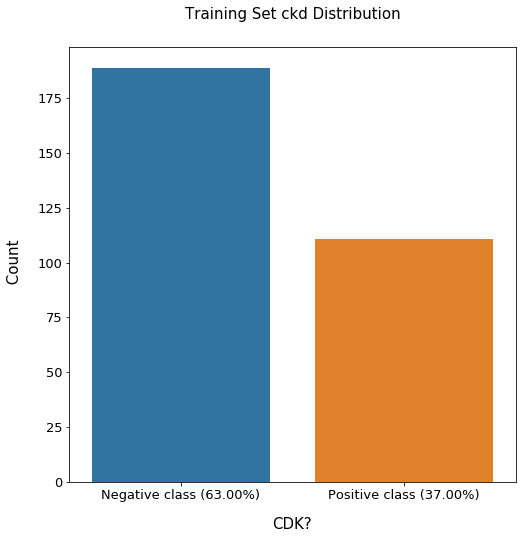

In [19]:
### Target variable exploration

target_variable_exploration(train_data, "classification", 'CDK?', ' Count', 'Training Set ckd Distribution')

The classes are slithly umbalanced. This should not cause any problem.???

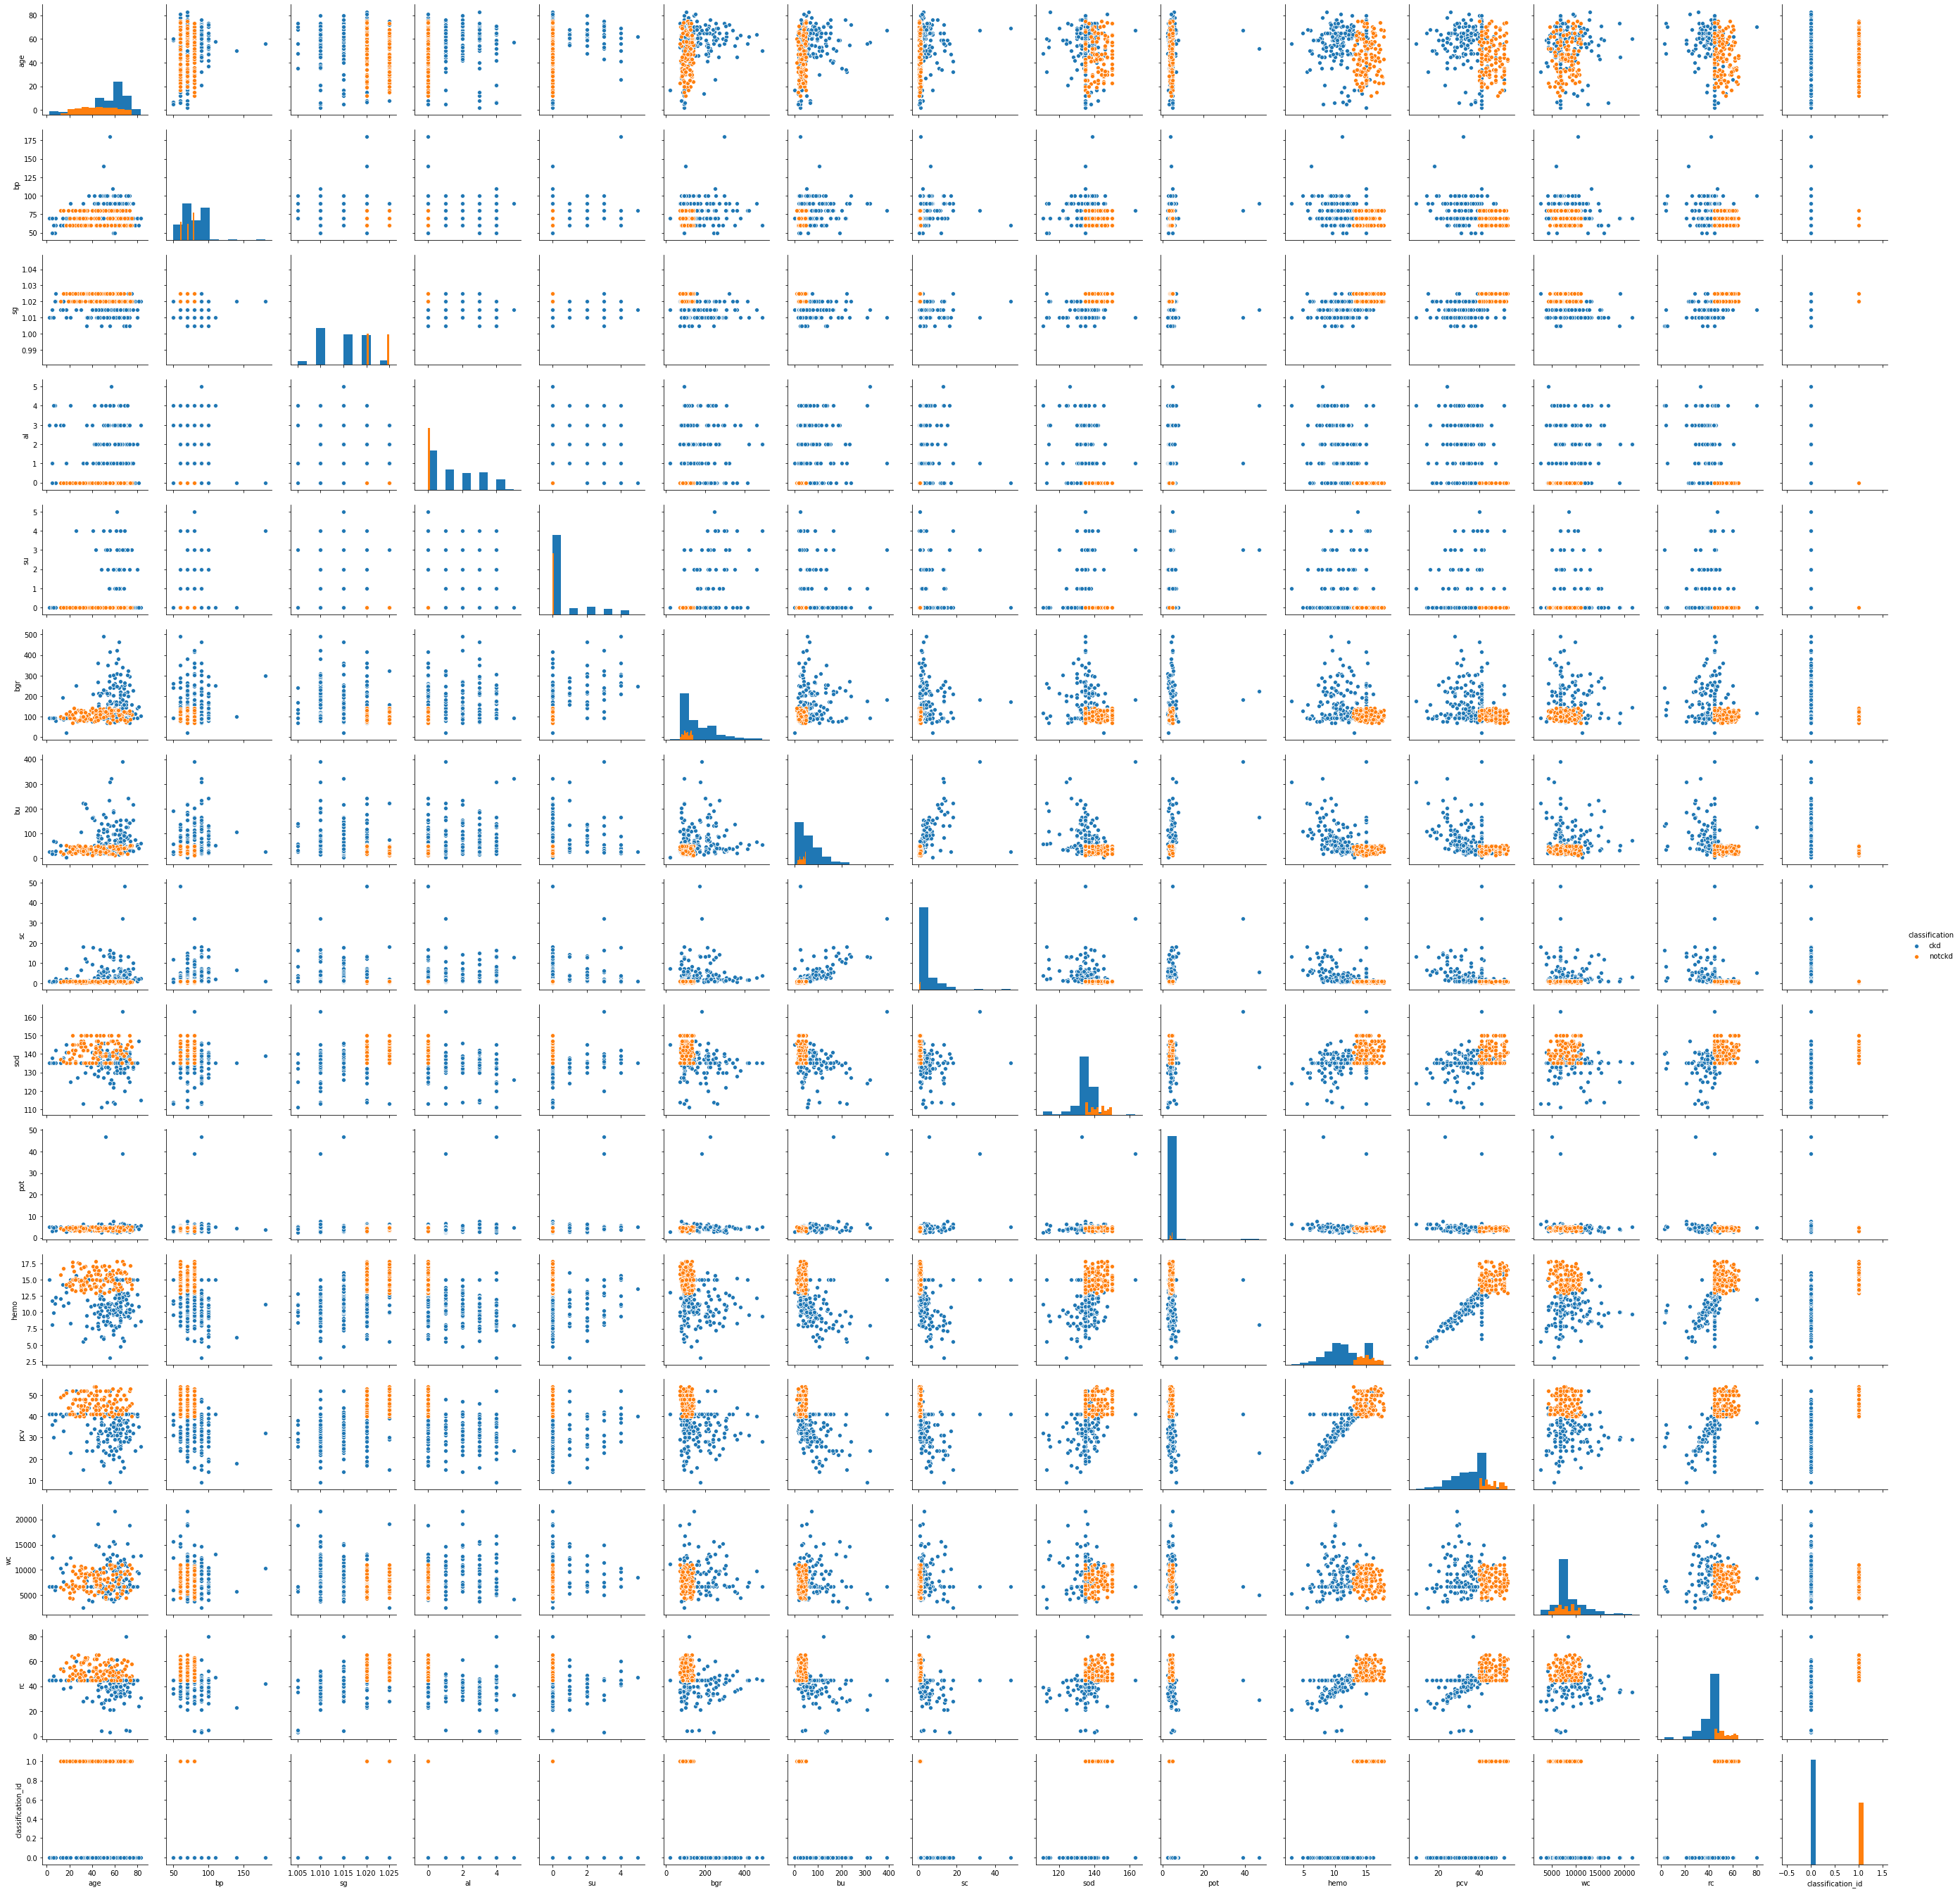

In [24]:
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

### Analyse :
    - Pour les variable "RC", "WC", "pvc", "hemo", "sod", les grands valeurs correspondent à des plus grandes probabilités de non cdk
    - Corrélation lineare entre pvc et hemo"
    _ ba une modalité n'a que des valeurs ckd
    - The histograms of the numeric data show that there are numeric values present in the dataset that consists of few discrete values, e.g. "sg". These features will be transformed later in the data manipulation part from numerical to categorical. 
    - There are some categorical features, where the different categories occur with similar frequency, e.g. for "sg"; and there are feature, where one category is very dominant, e.g. for "su".
    - Some features show a linear relationship with each other, for example "hema" and "pcv". We will study later correlation relationships between variables.
    
    

In [5]:
categorical_features = getCategFeat(train_data,7,'classification')# To match dataset desciprtion on UCI website, n=7
print("Categorical Features : ",categorical_features)
numerical_features = [c for c in train_data.columns if c not in categorical_features and c!="classification"]
print("Numerical Features : ", numerical_features)

Categorical Features :  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical Features :  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


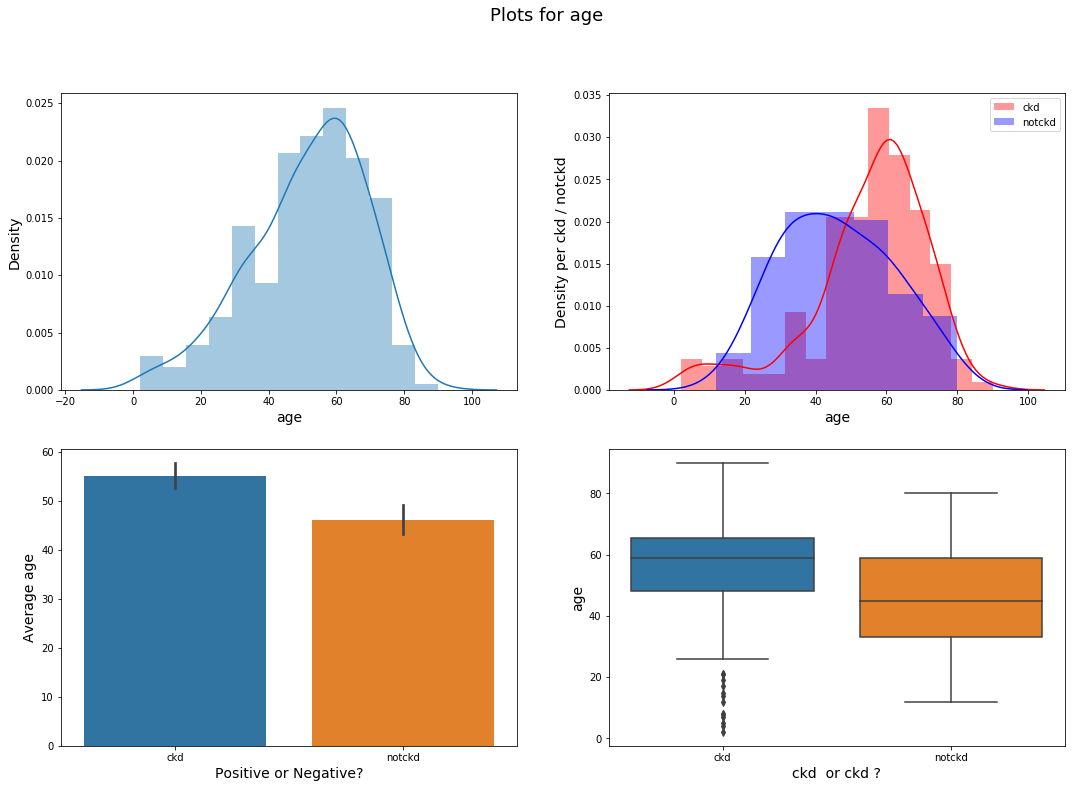

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


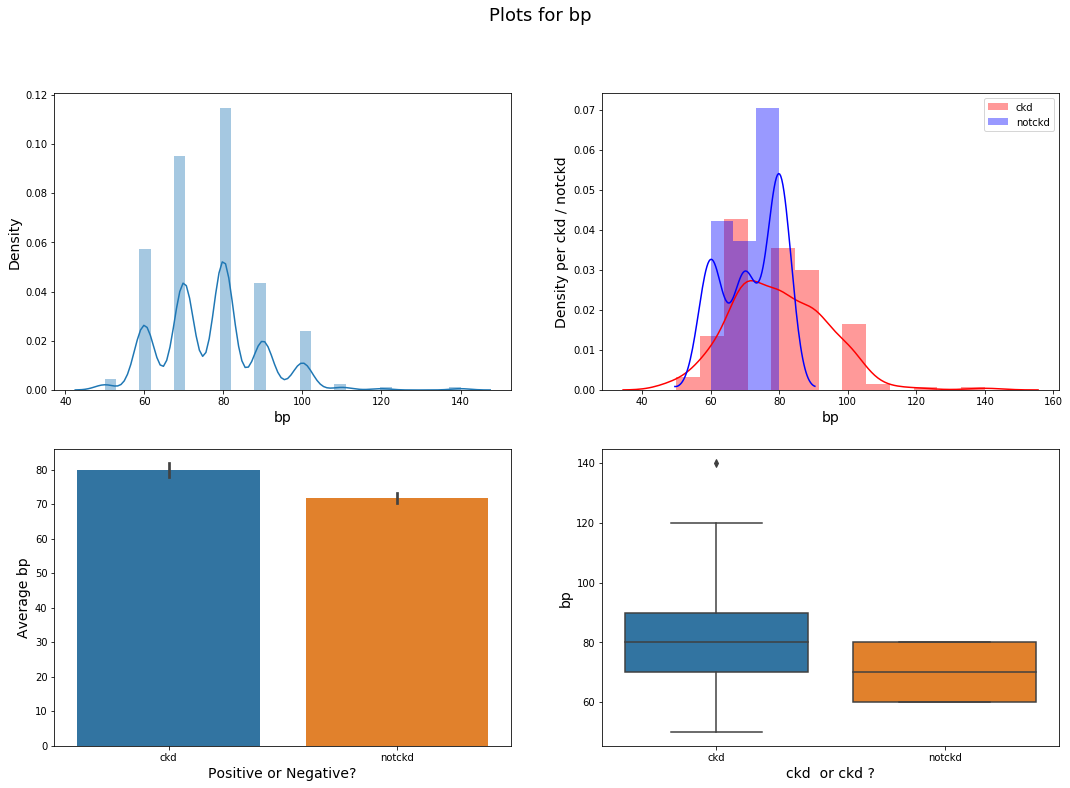

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


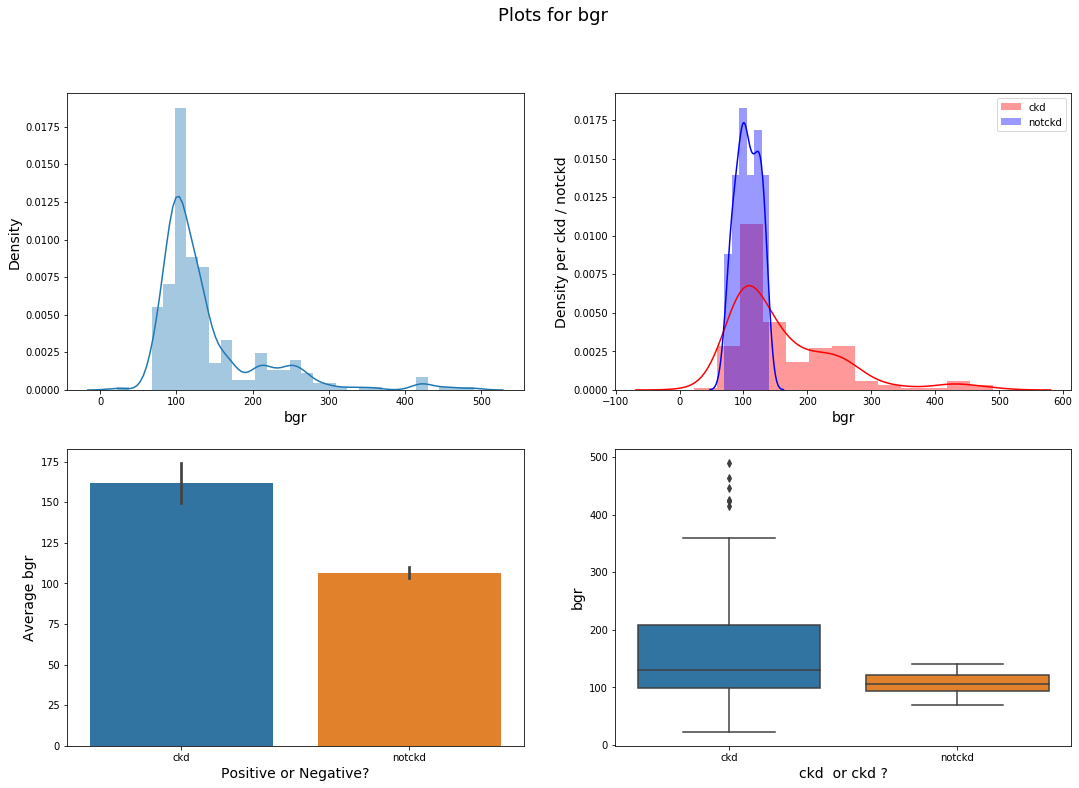

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


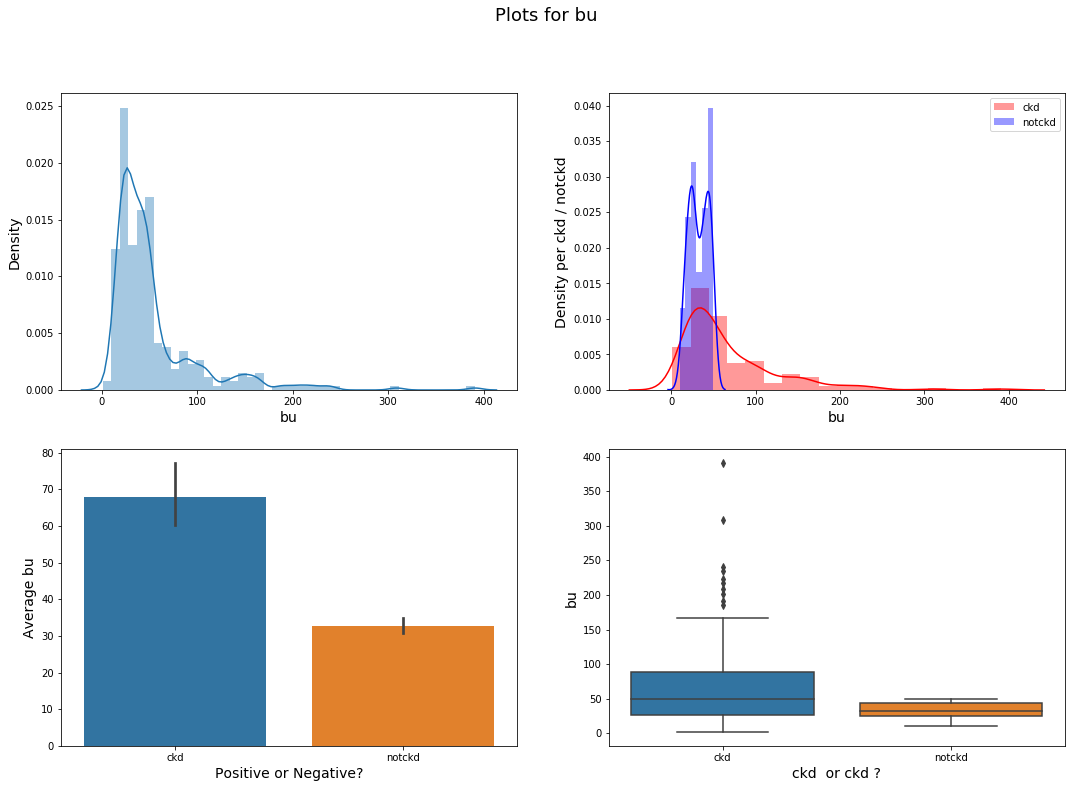

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


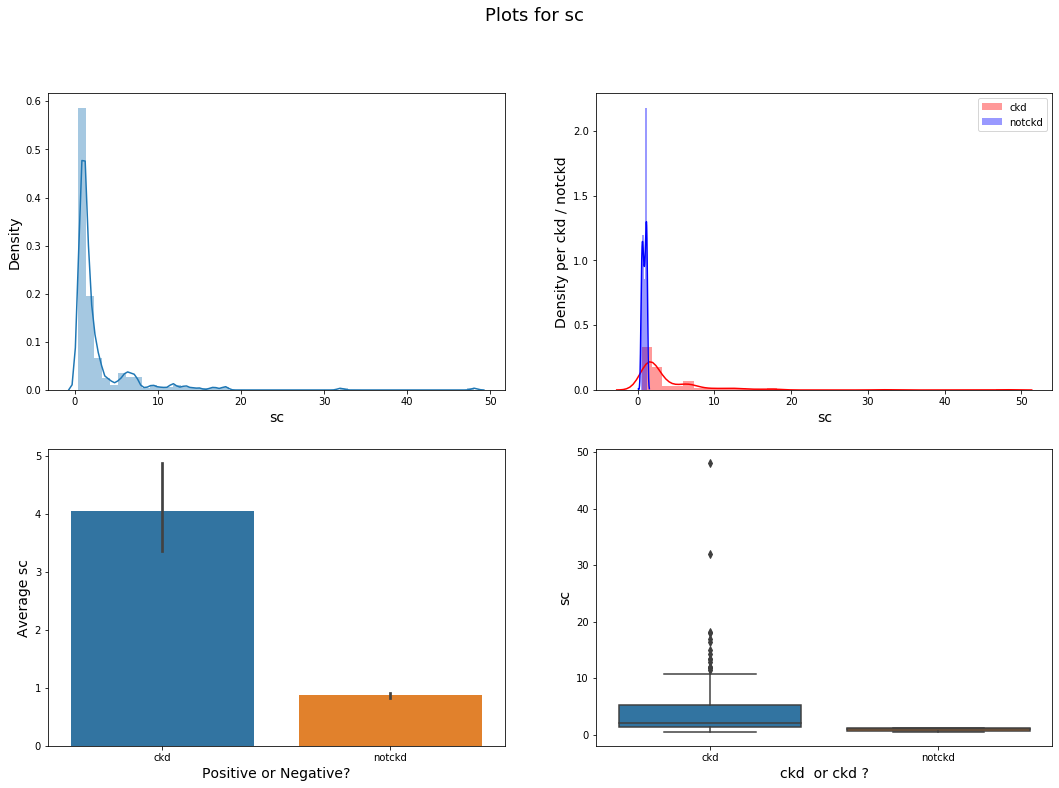

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


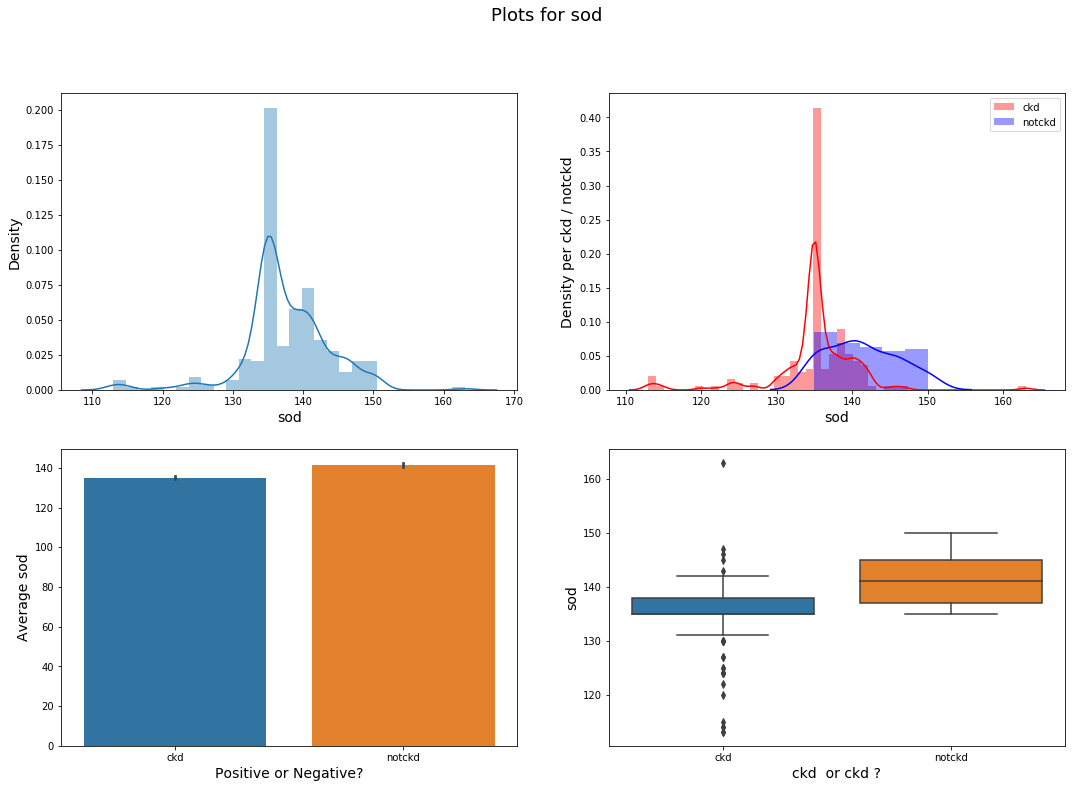

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


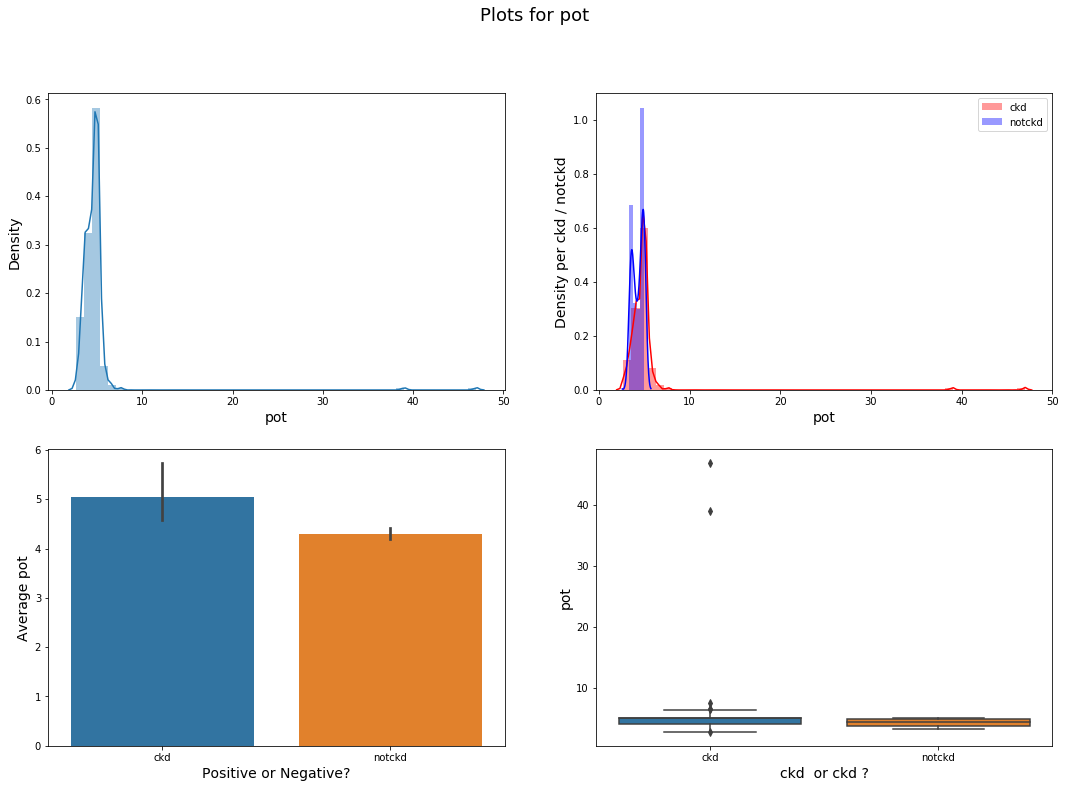

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


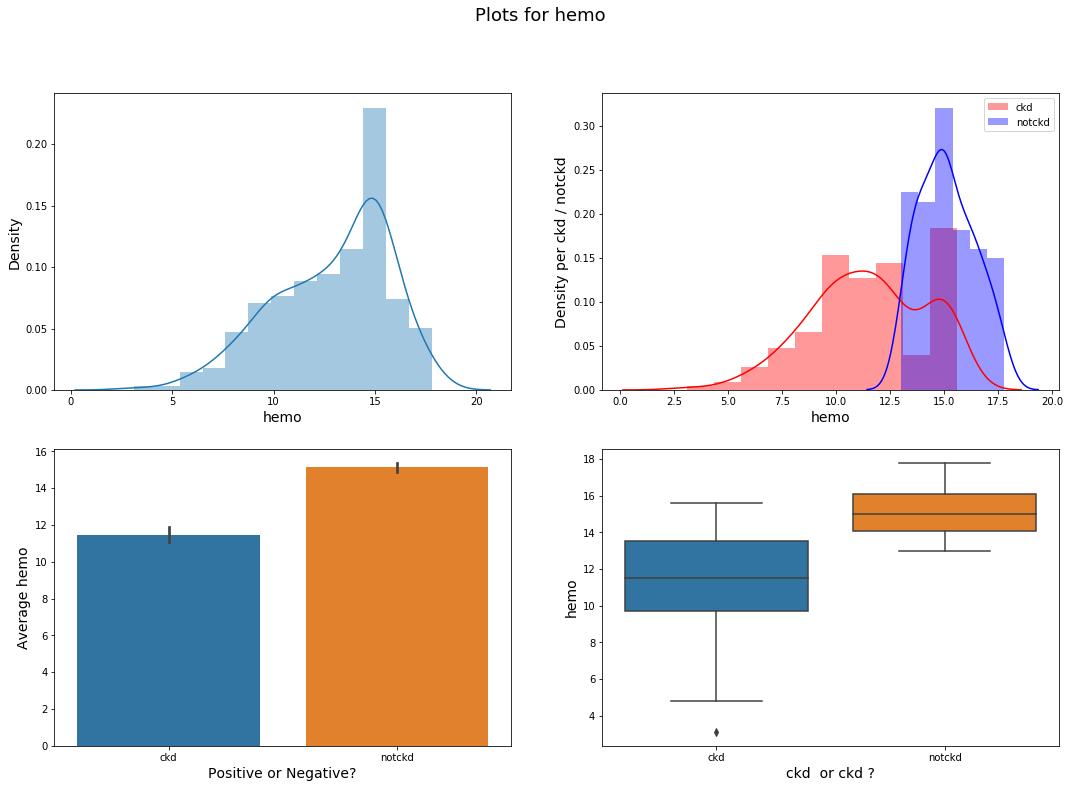

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


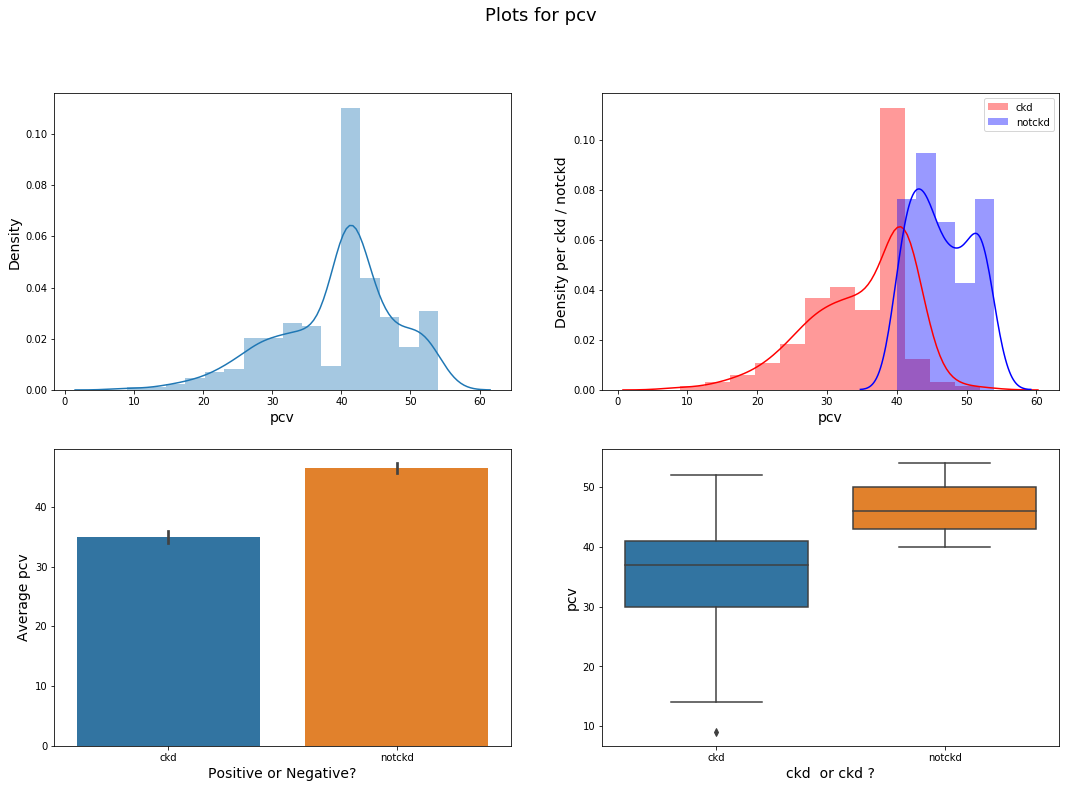

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


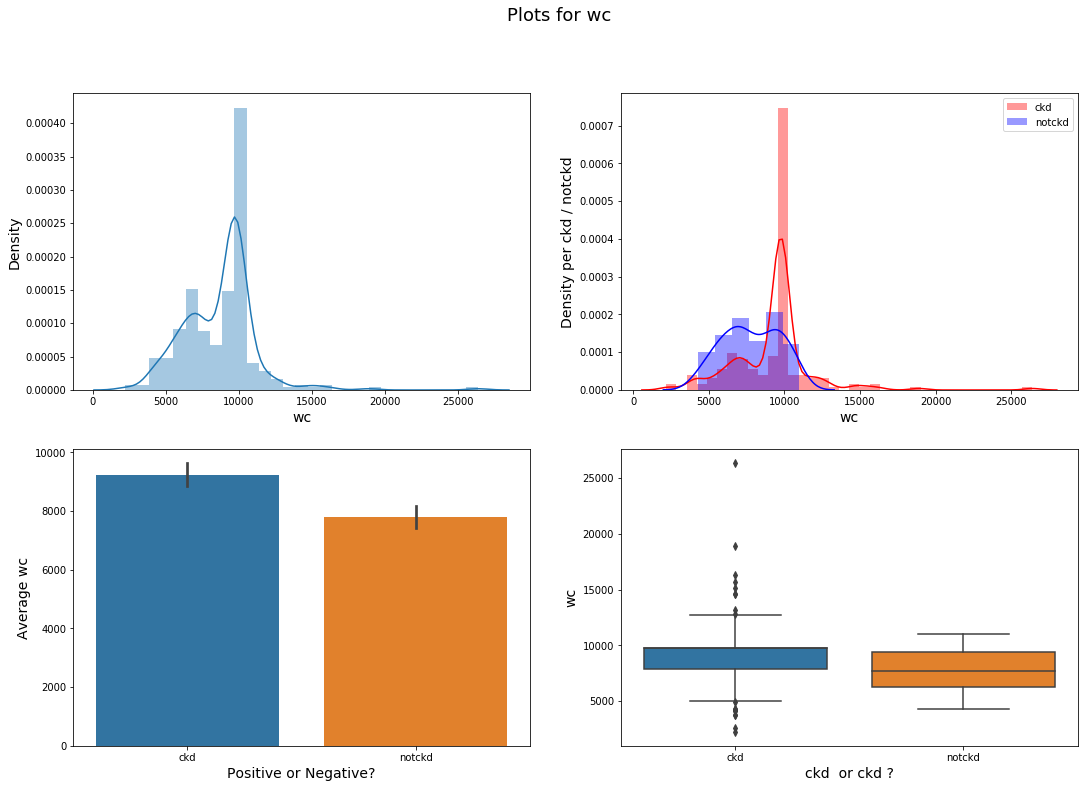

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


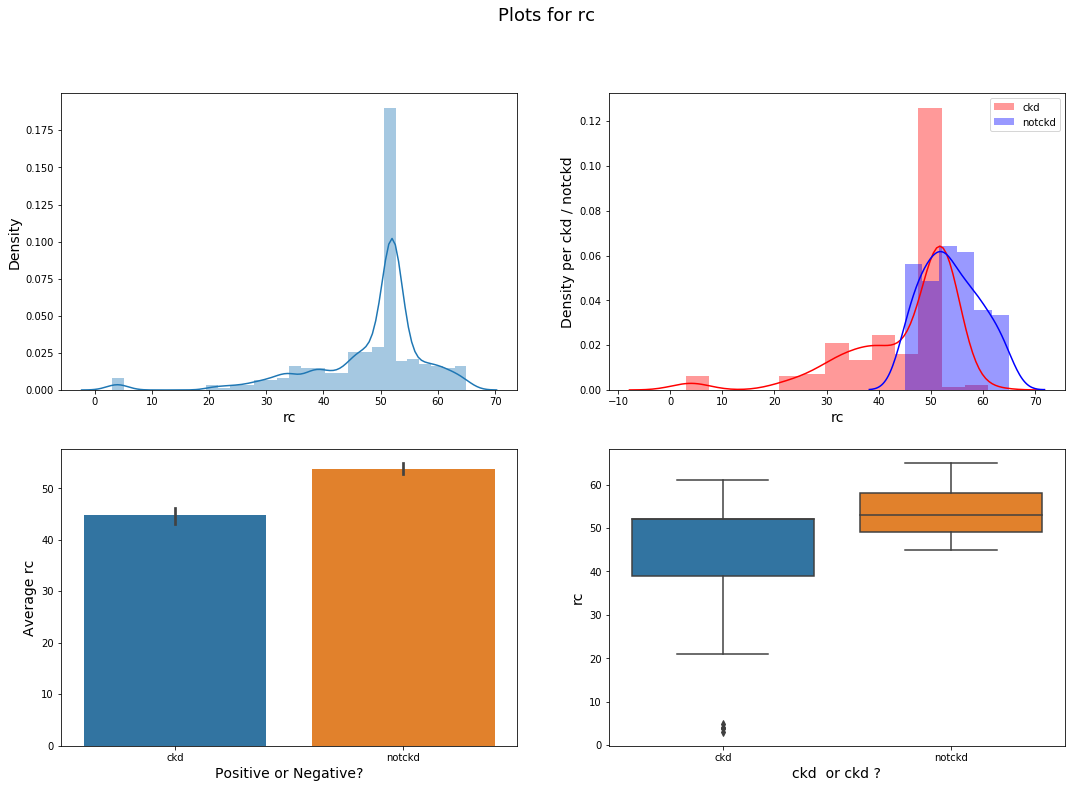

In [16]:
### Plotting Numeric Features
plot_numeric(train_data, numerical_features, 'classification')


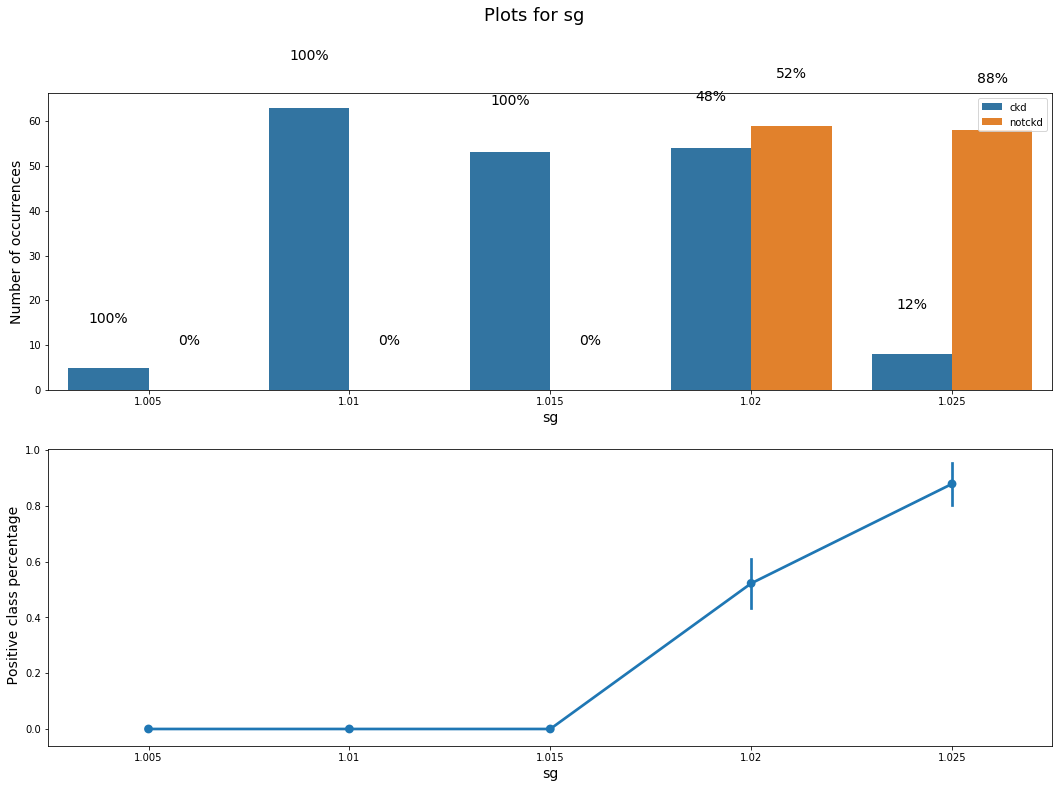

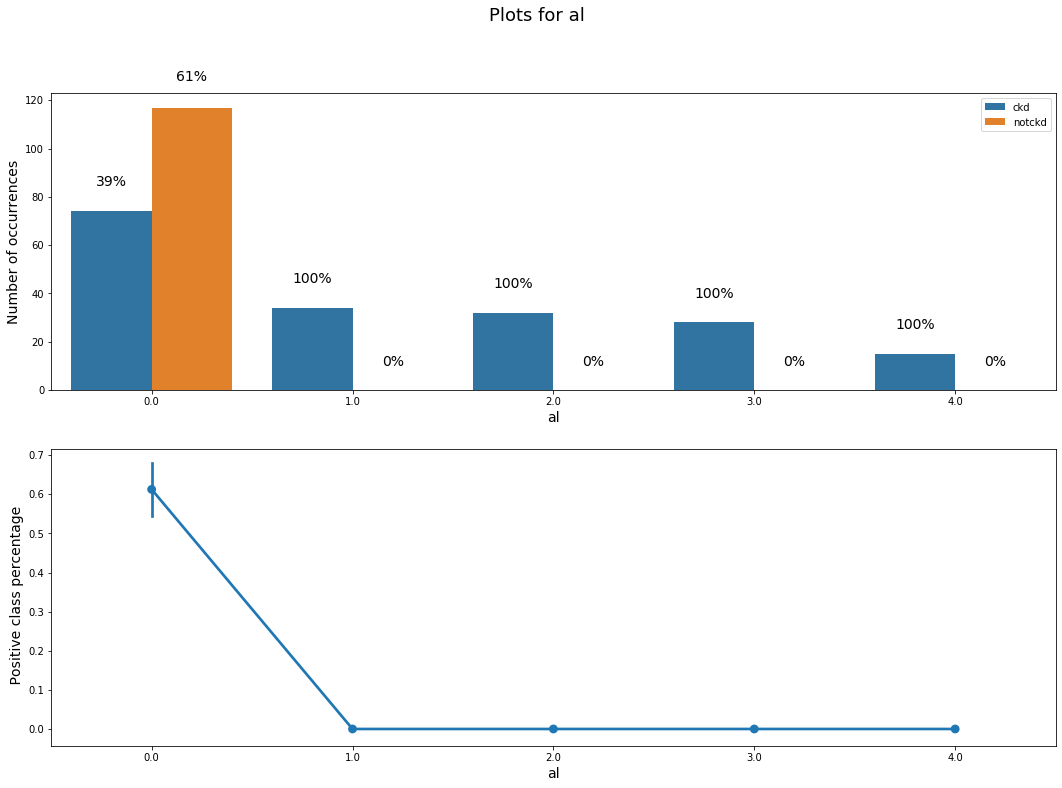

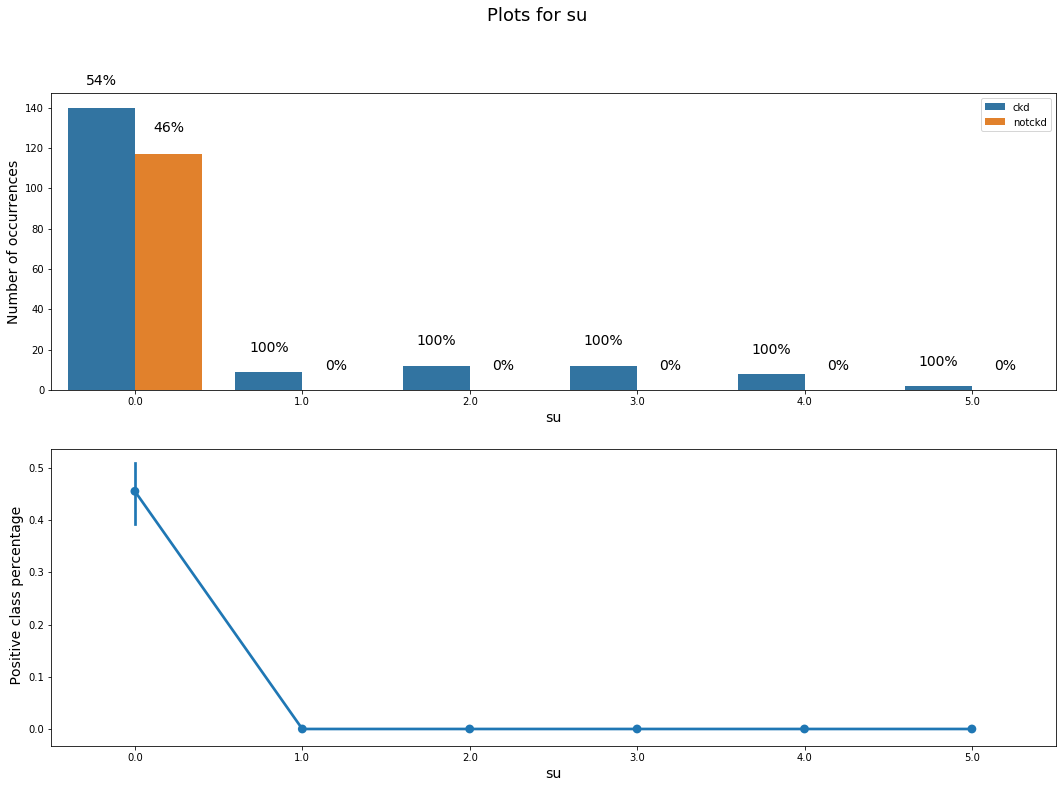

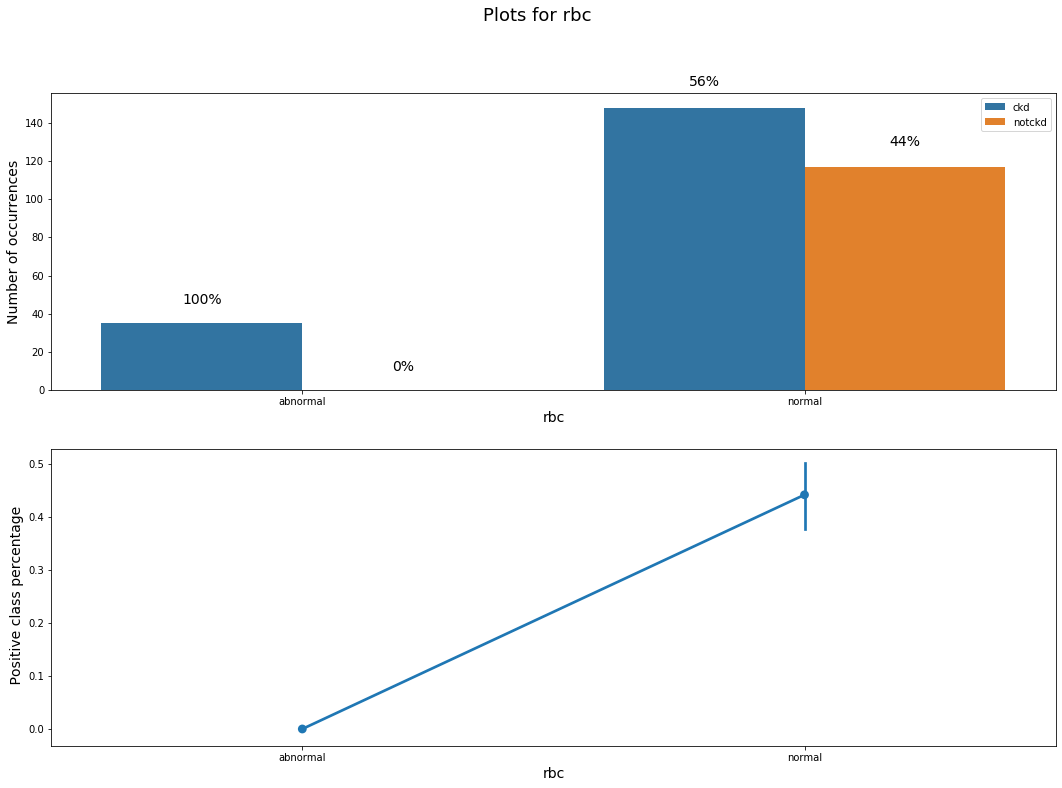

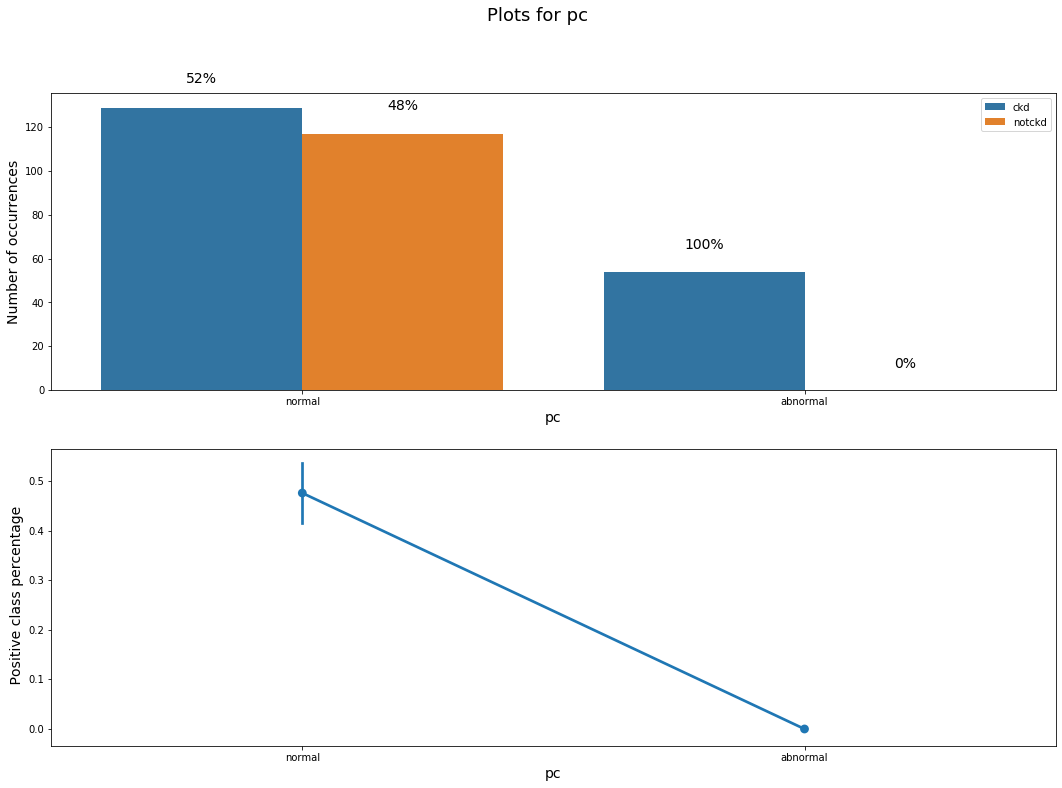

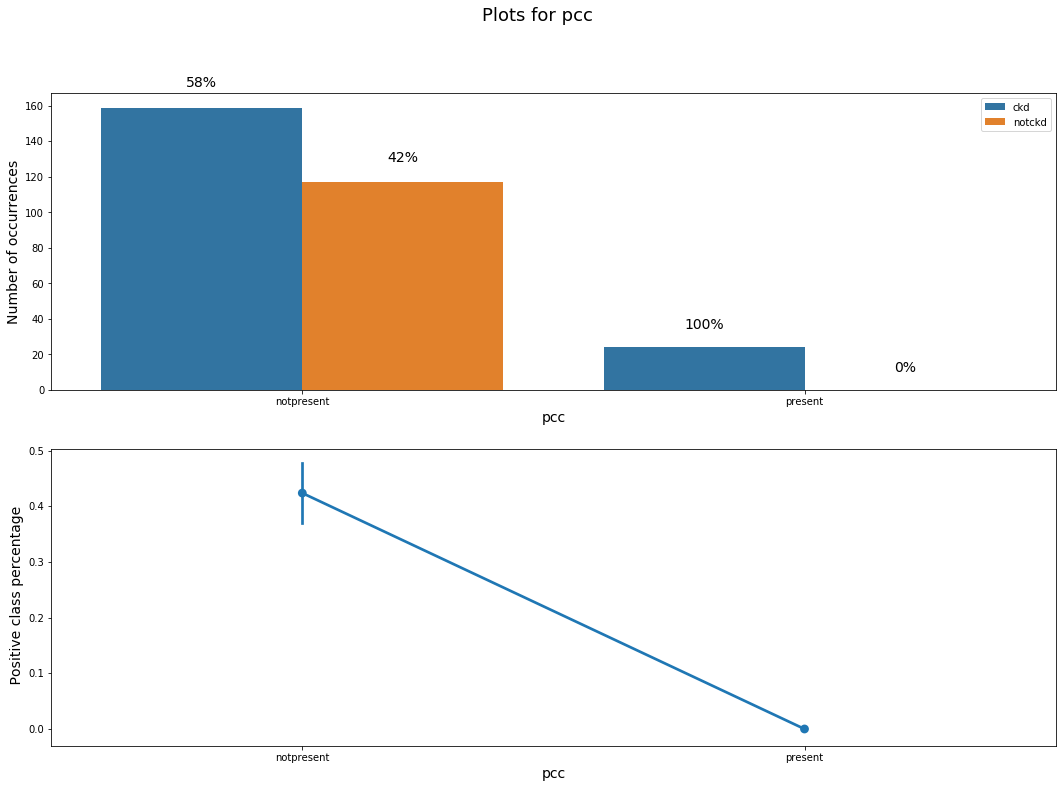

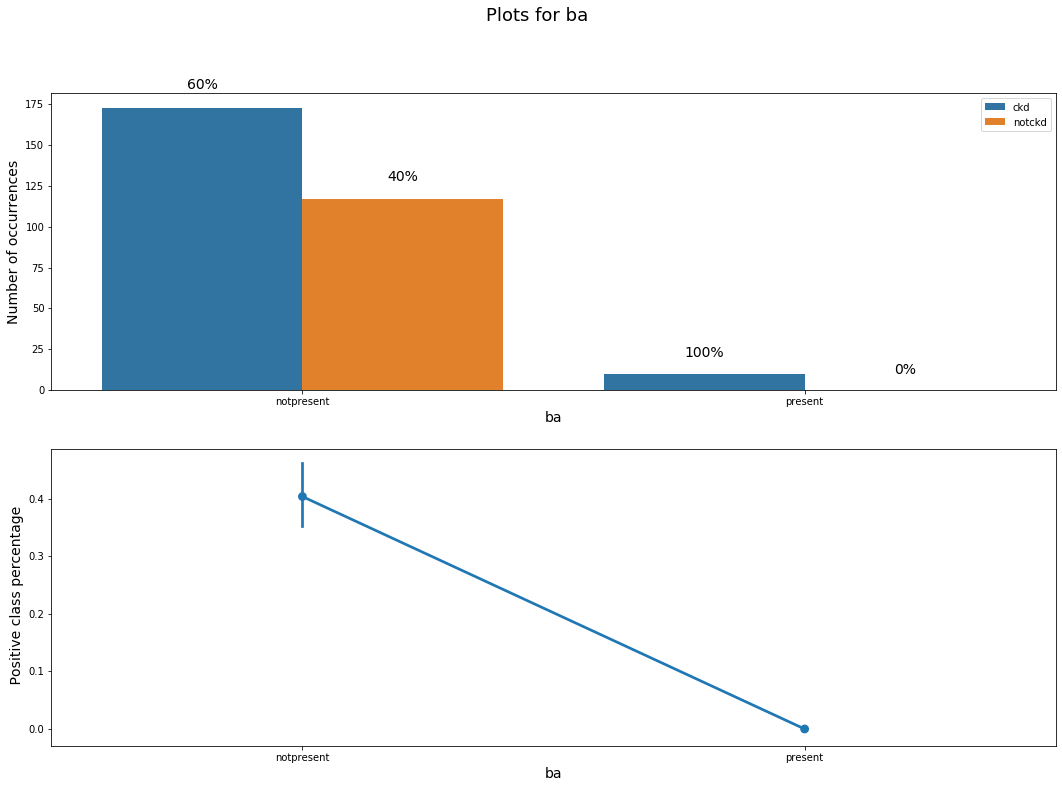

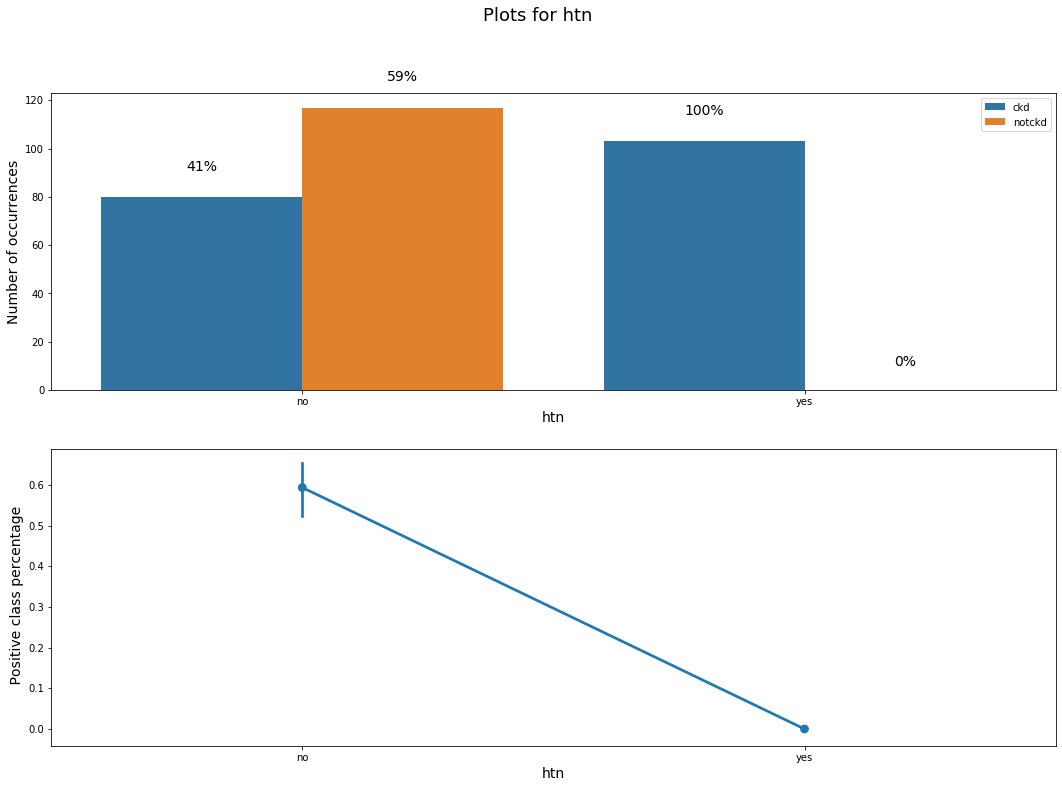

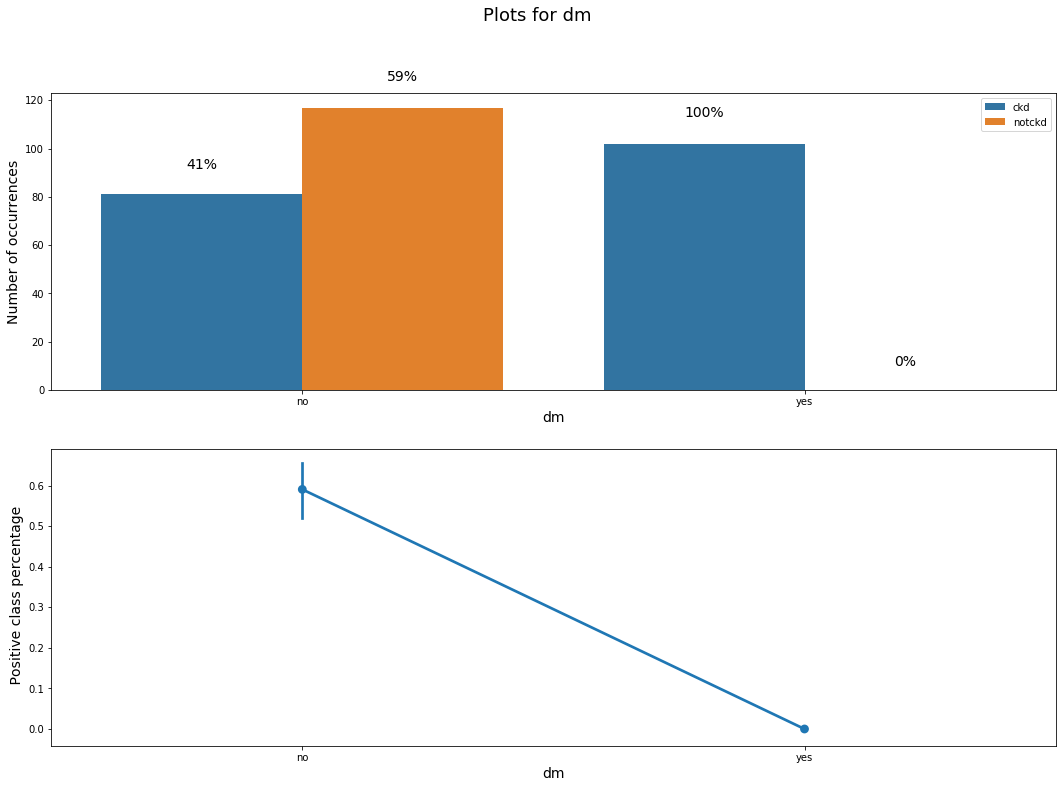

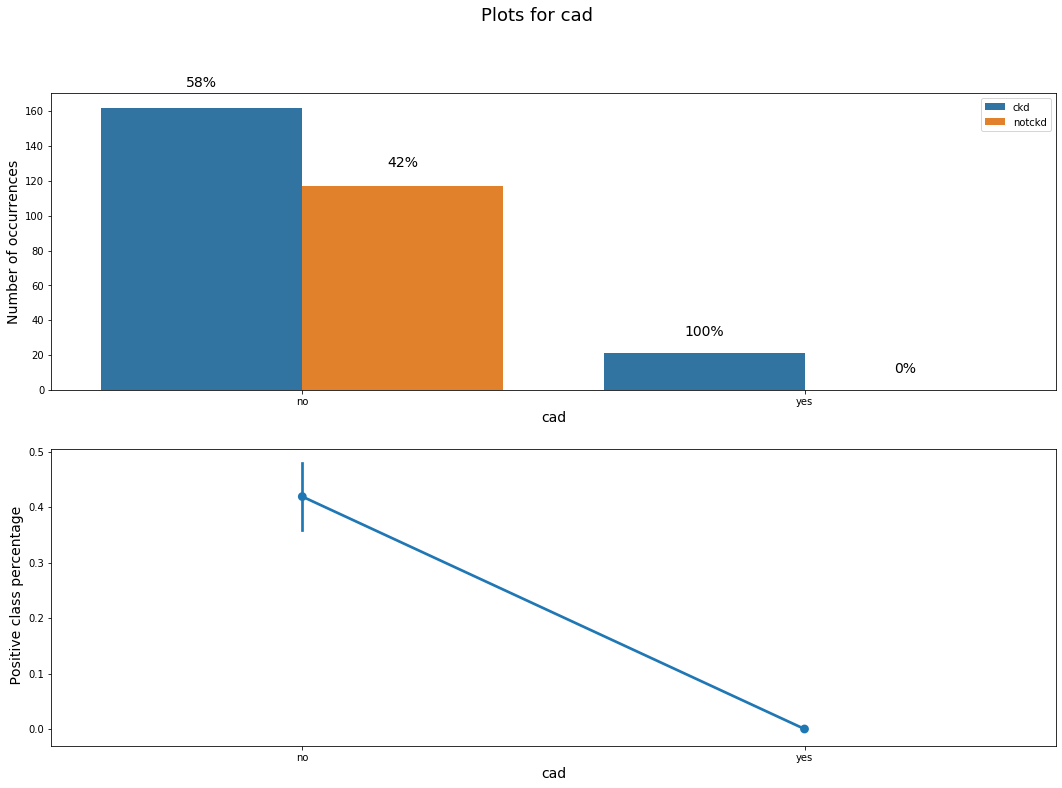

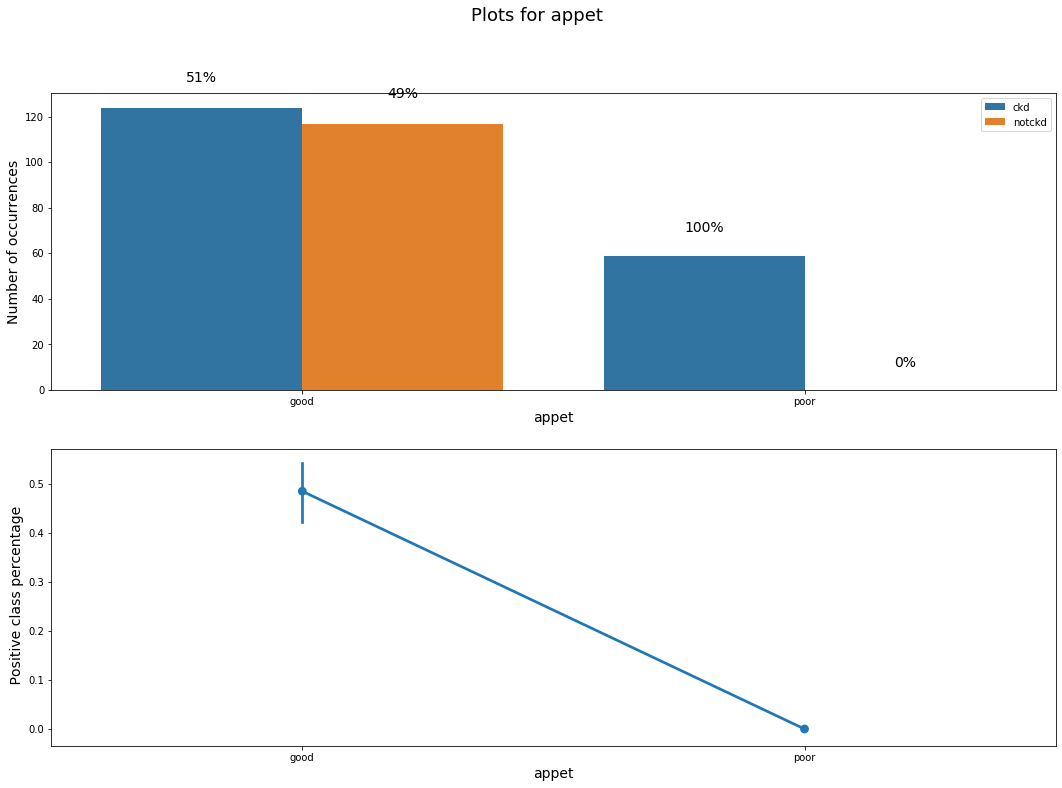

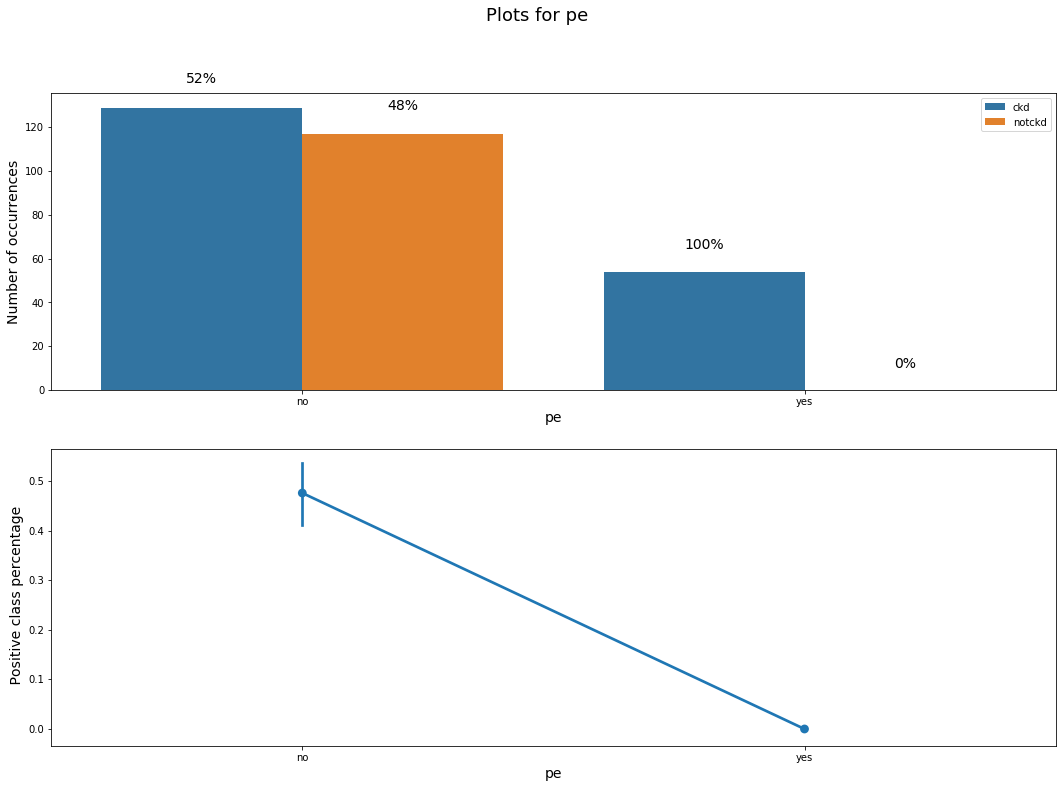

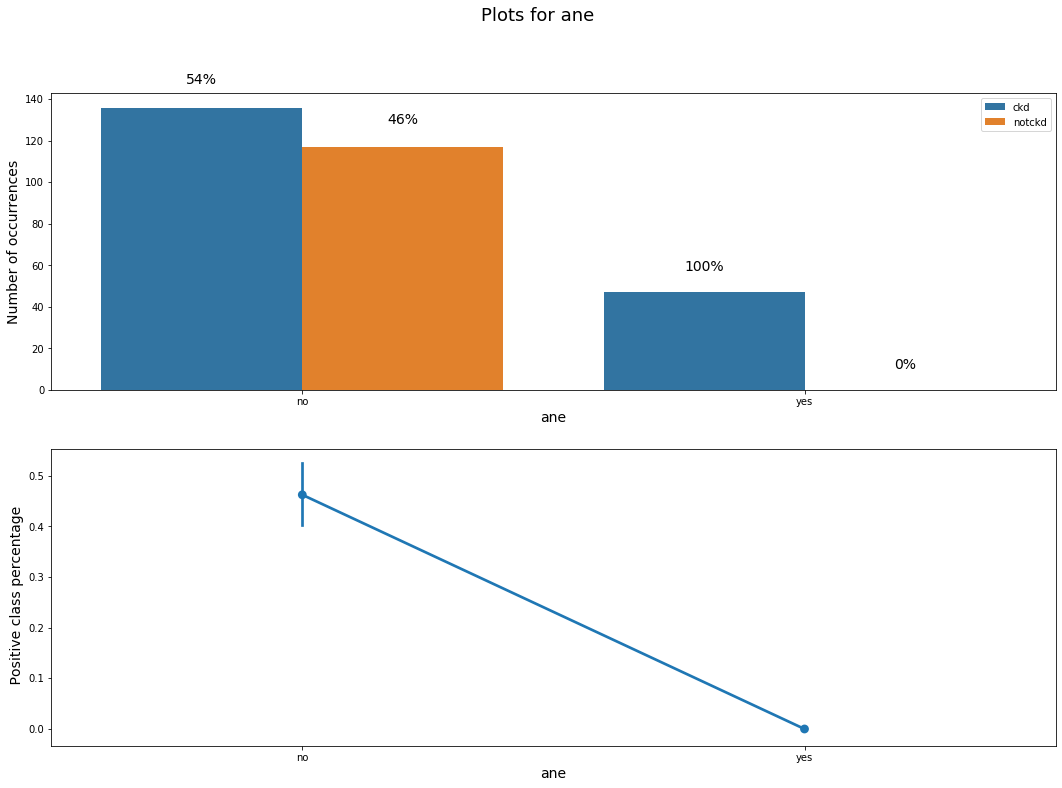

In [18]:
##### Plotting nominal Categorical Features        
plot_categ(train_data,"classification", categorical_features[:-2])# remove target columns

    - Induviduals having some features (eg "su" > 0, "ane"=yes, etc) are necessarly ill.

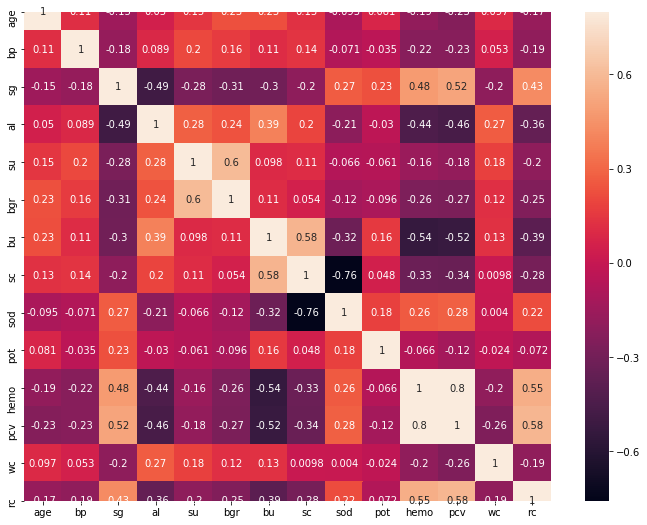

In [6]:
# Correlation Analyses
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot=True, square=True);
# fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # Gets the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

As we have seen above in scatter plots, "hemo" and "pvc" are highly correlated

In [6]:
train_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
train_data, test_data = train_data.drop("pcv", axis=1), test_data.drop("pcv", axis=1)
numerical_features = [f for f in numerical_features if f!="pcv"]

### Scaling and Encoding :

In [7]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

transf_train = featureEng(numerical_features, categorical_features).fit(train_data)
X_train = transf_train.transform(train_data)
y_train = train_data['classification'].replace({'ckd':1,'notckd':0}).values

In [8]:
#  get columns names after transformations
columns_eng = numerical_features + transf_train.transformers_[1][1].get_feature_names(categorical_features).tolist()


### PCA :

In [26]:
# PCA on numerical features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[:,:len(numerical_features)])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

In [41]:
pca.explained_variance_ratio_

array([0.29715203, 0.14158219])

The explained variance is small since we convert a 10 dimentional space to a two dimensional space. (Kaiser rule is not verified)

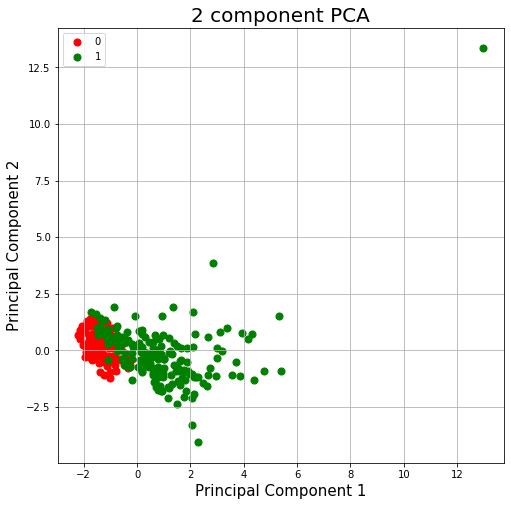

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

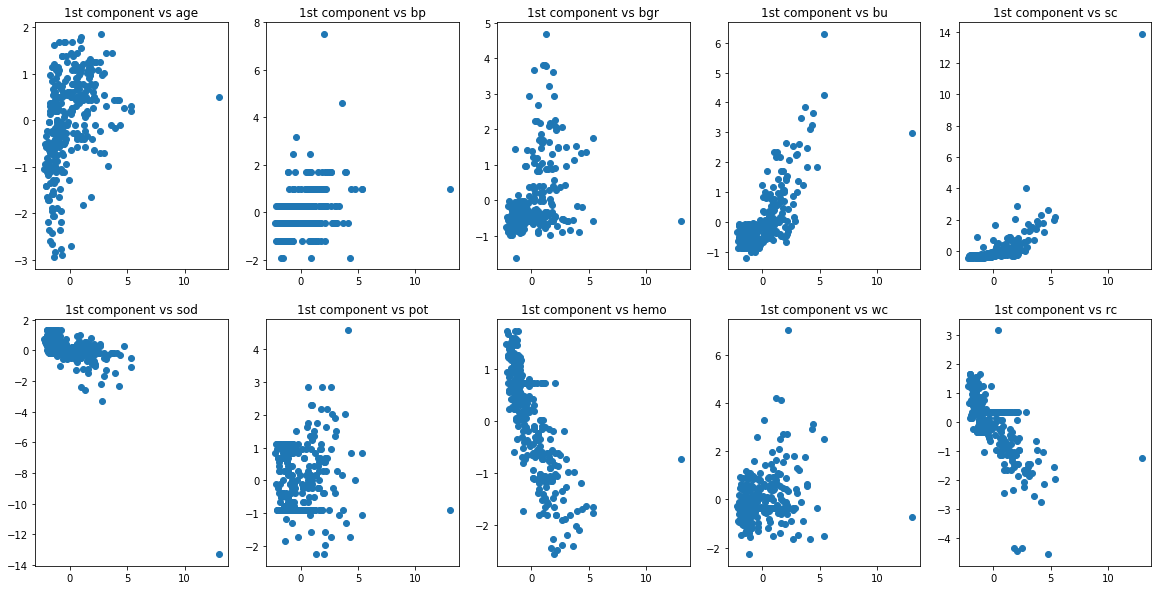

In [35]:
# P
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,0], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

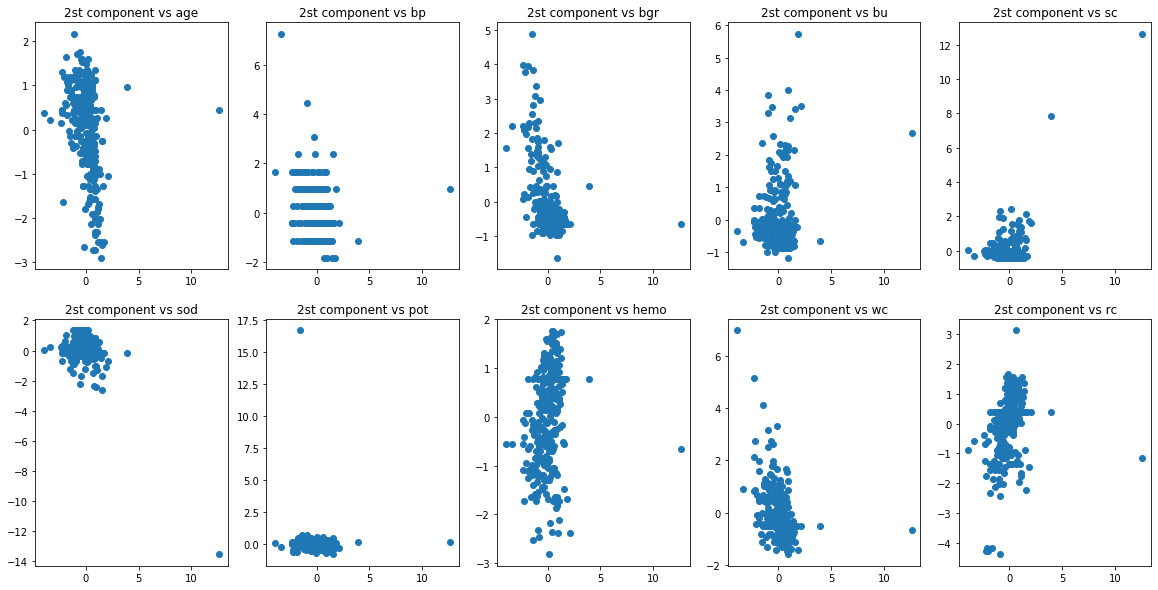

In [177]:
# P
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,1], X_train[:,col_id])
            axes[i][j].set_title(f'2st component vs {columns_eng[col_id]}')
            col_id = col_id+1
        except :
            break

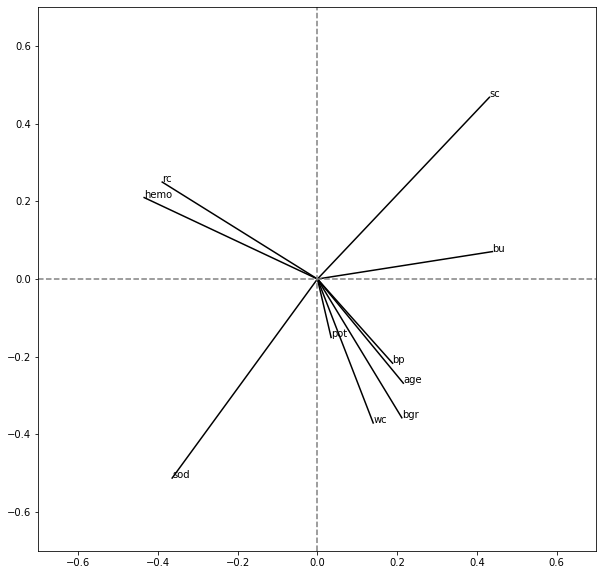

In [31]:
components = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, numerical_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

#### Feature Selection

In [36]:
X_train.shape

(300, 47)

Data has now 47 features. To reduce execution time and complexity we will select the most important ones to feed them to models.

In [9]:
## Using Mutual information

from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

ndiscrete = len(transf_train.transformers_[1][1].get_feature_names(categorical_features))
discreteCol = np.arange(len(X_train[0])-ndiscrete,len(X_train[0]))
#discrete_mutual_info_classif = partial(mutual_info_classif, 
                                     # discrete_features=discreteCol)
#featS = SelectKBest(score_func=discrete_mutual_info_classif).fit(X_train,y_train )


In [10]:
FSelector_mi = selectFeaturesTransformer(k=10,method="Mutual Information",discreteCol=discreteCol)
FSelector_rf = selectFeaturesTransformer(k=10,method="Random Forest")
FSelector_mi.fit(X_train,y_train)
FSelector_rf.fit(X_train,y_train)




selectFeaturesTransformer(discreteCol=[], k=10, method='Random Forest')

In [87]:
print("Top 10 selected by Mutual information")
print([columns_eng[i]  for i in FSelector_mi.order[:10]])
print("Top 10 selected by Random Forest")
print([columns_eng[i]  for i in FSelector_rf.order[:10]])

Top 10 selected by Mutual information
['hemo', 'rc', 'sc', 'al_0.0', 'htn_yes', 'htn_no', 'dm_yes', 'dm_no', 'bp', 'bu']
Top 10 selected by Random Forest
['hemo', 'sod', 'htn_no', 'rc', 'sg_1.025', 'wc', 'al_0.0', 'dm_yes', 'sc', 'sg_1.01']


There is a big similarity between features selected by the two methods.
Unlike correlations study, Mutual information takes into consideration non linear relationship between variables. However, It does not consider the interaction between variables like RF does. Therefore, we will use feature selected by this latter.


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.linear_model import SGDClassifier
classifiers = [
    SGDClassifier(loss='log'), # for logistic regression
   KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB()]

ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)

#ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq]

names = ["Logistic Regression with SGD", "Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest","Gradient Boosting", "Neural Net",
         "Naive Bayes"]

parameters = {"Logistic Regression with SGD" : {'Classifier__penalty':['l1','l2',None],
                                               'Classifier__learning_rate' : ['constant','optimal','adaptive'],
                                               'Classifier__eta0' : [0.1]},
    "Nearest Neighbors" : {'Classifier__n_neighbors':[5,8,10]},
        'SVM':{'Classifier__kernel':['linear','rbf'],'Classifier__C':[0.1,0.5,1.,1.5]},
        "Gaussian Process":{"Classifier__kernel": kernel_list,
                            "Classifier__n_restarts_optimizer": [1, 2, 3]},
        "Decision Tree" : {"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]}
        ,"Random Forest":{"Classifier__n_estimators":[8,10,20,50],"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]},
       'Gradient Boosting':{"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[2,3,10],
                        "Classifier__learning_rate":[1e-1,1e-2,1e-3]},
         "Neural Net" : {'Classifier__hidden_layer_sizes': [(20,20,20), (25,50,25), (50,50)],
                      'Classifier__activation': ['tanh', 'relu'],"Classifier__learning_rate_init":[1e-1,1e-2,1e-3]},
        "Naive Bayes" : {"Classifier__var_smoothing" : [1e-8, 1e-9]}
         }

In [12]:
from sklearn.pipeline import Pipeline
# iterate over classifiers
from sklearn.model_selection import GridSearchCV
from IPython.display import display

results = pd.DataFrame()
for name, clf in zip(names, classifiers):
    print('############# ', name, ' #############')
    #print(params[name])
    FSelector = selectFeaturesTransformer()
    pipeline = Pipeline([('FeatureSelection',FSelector),('Classifier',clf)])
    parameters[name]['FeatureSelection__method'] = ['RF']
    parameters[name]['FeatureSelection__k']=[10,20,30,47]
   # print(parameters[name])
    classifier = GridSearchCV(pipeline, parameters[name], cv=3)
    #print(classifier)
    classifier.fit(X_train, y_train)
    # All results
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    r = pd.DataFrame(means,columns = ['mean_test_score'])
    r['std_test_score'] = stds
    r['params'] = classifier.cv_results_['params']
    r['classifier'] = name
    display(r.sort_values(by=['mean_test_score','std_test_score'],ascending =False))
    results = pd.concat([results, r], ignore_index=True)
    #for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        

# To do : Store overall 3 best performances 
    

#############  Logistic Regression with SGD  #############


,mean_test_score,std_test_score,params,classifier
18,0.986667,0.012472,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
7,0.983333,0.012472,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
22,0.983333,0.012472,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
15,0.980000,0.016330,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
1,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
2,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
3,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
11,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
27,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
31,0.980000,0.014142,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD


#############  Nearest Neighbors  #############


,mean_test_score,std_test_score,params,classifier
0,0.950000,0.028284,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
1,0.950000,0.021602,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
5,0.940000,0.028284,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
4,0.933333,0.038586,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
8,0.930000,0.043205,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
2,0.920000,0.024495,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
9,0.920000,0.021602,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
3,0.910000,0.037417,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
6,0.893333,0.026247,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
10,0.886667,0.024944,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors


#############  SVM  #############


,mean_test_score,std_test_score,params,classifier
2,0.980000,0.008165,"{'Classifier__C': 0.1, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
3,0.980000,0.008165,"{'Classifier__C': 0.1, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM
10,0.980000,0.008165,"{'Classifier__C': 0.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
22,0.980000,0.008165,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
30,0.980000,0.000000,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
11,0.976667,0.009428,"{'Classifier__C': 0.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM
18,0.976667,0.009428,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
19,0.976667,0.009428,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM
21,0.976667,0.004714,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",SVM
23,0.976667,0.004714,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM


#############  Gaussian Process  #############


,mean_test_score,std_test_score,params,classifier
15,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
19,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
23,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
14,0.980000,0.008165,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
18,0.980000,0.008165,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
22,0.980000,0.008165,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
13,0.973333,0.016997,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
17,0.973333,0.016997,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
21,0.973333,0.016997,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
1,0.966667,0.016997,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process


#############  Decision Tree  #############


,mean_test_score,std_test_score,params,classifier
25,0.993333,0.009428,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
10,0.990000,0.008165,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
34,0.990000,0.008165,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
46,0.990000,0.008165,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
9,0.986667,0.012472,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
21,0.986667,0.012472,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
33,0.986667,0.012472,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
45,0.986667,0.012472,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
18,0.986667,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
22,0.986667,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree


#############  Random Forest  #############


,mean_test_score,std_test_score,params,classifier
31,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
13,0.996667,0.004714,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest
14,0.996667,0.004714,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
15,0.996667,0.004714,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
25,0.996667,0.004714,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest
...,...,...,...,...
130,0.973333,0.009428,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'Classifier__n_estimators': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
34,0.973333,0.004714,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'Classifier__n_estimators': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
5,0.970000,0.014142,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest
114,0.966667,0.004714,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest


#############  Gradient Boosting  #############


,mean_test_score,std_test_score,params,classifier
63,1.000000,0.000000,"{'Classifier__learning_rate': 0.01, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
67,1.000000,0.000000,"{'Classifier__learning_rate': 0.01, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
1,0.996667,0.004714,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gradient Boosting
2,0.996667,0.004714,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting
3,0.996667,0.004714,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
...,...,...,...,...
103,0.630000,0.000000,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
104,0.630000,0.000000,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Gradient Boosting
105,0.630000,0.000000,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gradient Boosting
106,0.630000,0.000000,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting


#############  Neural Net  #############


,mean_test_score,std_test_score,params,classifier
39,0.993333,0.004714,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Neural Net
27,0.990000,0.008165,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Neural Net
46,0.990000,0.008165,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
69,0.990000,0.008165,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Neural Net
42,0.986667,0.012472,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
...,...,...,...,...
16,0.963333,0.026247,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net
60,0.963333,0.018856,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net
12,0.960000,0.016330,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net
36,0.960000,0.014142,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net


#############  Naive Bayes  #############


,mean_test_score,std_test_score,params,classifier
3,0.990000,0.000000,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Naive Bayes
7,0.990000,0.000000,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Naive Bayes
2,0.986667,0.004714,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Naive Bayes
6,0.986667,0.004714,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Naive Bayes
1,0.980000,0.008165,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Naive Bayes
5,0.980000,0.008165,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Naive Bayes
0,0.943333,0.032998,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Naive Bayes
4,0.943333,0.032998,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Naive Bayes


In [34]:
results_sorted = results.sort_values(by=['mean_test_score','std_test_score'],ascending =False)
results_sorted.iloc[:10]

,mean_test_score,std_test_score,params,classifier
163,1.0,0.0,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
166,1.0,0.0,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
183,1.0,0.0,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
215,1.0,0.0,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
311,1.0,0.0,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
327,1.0,0.0,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
347,1.0,0.0,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
363,1.0,0.0,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
370,1.0,0.0,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting
371,1.0,0.0,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting


We keep tree best models (with their best so) : 


In [94]:
# apply transformations on test data
test_data = transf_alphaN.transform(test_data)
test_data = transf_num.transform(test_data)
test_data = transf_Missing.transform(test_data)


In [95]:
#test_data = test_data.drop("pcv", axis=1)
y_test = test_data['classification'].replace({'ckd':1,'notckd':0}).values
X_test = transf_train.transform(test_data)

In [97]:
X_test

array([[ 0.3593597 ,  0.34225936, -0.55041289, ...,  0.        ,
         0.        ,  1.        ],
       [-1.02501153,  1.13821136, -0.63871442, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62123659,  0.34225936, -0.84054649, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.5324061 , -0.45369264, -0.55041289, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.7054525 ,  1.93416336, -0.81531748, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.85909519, -0.45369264, -0.51256937, ...,  0.        ,
         0.        ,  1.        ]])

In [98]:
model_selected = results_sorted.iloc[0]
model = classifiers[names.index(model_selected['classifier'])]
param = {key.split('__')[1]:val for key,val in model_selected['params'].items() if 'FeatureSelection' not in key } 
model.set_params(**param)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=['notckd','ckd']))

              precision    recall  f1-score   support

      notckd       1.00      1.00      1.00        37
         ckd       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 2). Banknote Authentication

In [30]:
data = pd.read_csv(r'./data/data_banknote_authentication.txt', names  = ['variance','skewness','curtoisis','entropy','classification'])
# Split it to train and test
train_data, test_data = train_test_split(data) 
train_data

,variance,skewness,curtoisis,entropy,classification
823,-1.97900,3.2301,-1.35750,-2.581900,1
820,-4.00250,-13.4979,17.67720,-3.320200,1
611,3.81970,8.9951,-4.38300,-4.032700,0
107,-1.85840,7.8860,-1.66430,-1.838400,0
423,-0.12196,8.8068,0.94566,-4.226700,0
...,...,...,...,...,...
800,-2.06310,-1.5147,1.21900,0.445240,1
832,-1.52200,-6.6383,5.74910,-0.106910,1
1063,-2.00660,-6.7190,9.01620,0.099985,1
690,5.85190,5.3905,-2.40370,-0.061652,0


In [25]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 339 to 221
Data columns (total 5 columns):
variance     1029 non-null float64
skewness     1029 non-null float64
curtoisis    1029 non-null float64
entropy      1029 non-null float64
class        1029 non-null int64
dtypes: float64(4), int64(1)
memory usage: 48.2 KB


In [26]:
# Statistical description
train_data.describe()

,variance,skewness,curtoisis,entropy,class
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.480278,1.779848,1.480334,-1.145579,0.441205
std,2.801621,5.912485,4.345827,2.072481,0.496773
min,-7.042100,-13.677900,-5.286100,-7.871900,0.000000
25%,-1.747900,-2.090000,-1.493800,-2.222400,0.000000
50%,0.539360,2.087900,0.666330,-0.562100,0.000000
75%,2.808400,6.675500,3.439100,0.399980,1.000000
max,6.824800,12.951600,17.677200,2.449500,1.000000


In [35]:
numerical_features = ['variance','skewness','curtoisis','entropy']

In [28]:
# Remove non alphanumeric 
transf_alphaN = FunctionTransformer(removeNonAlphanumeric, validate= False)
transf_num = FunctionTransformer(toNumeric, validate= False)
train_data = transf_alphaN.transform(train_data)
train_data = transf_num.transform(train_data)

In [29]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())
# Handle missing values
#df,imput_dict = handleMissing(train_data, "most_frequent")
transf_Missing = HandleMissingTransformer(method="median")
train_data = transf_Missing.fit(train_data).transform(train_data)
print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
[]
For non numeric columns, most frequent strategy is used
Columns with null values after imputing
[]


#### Data Viz

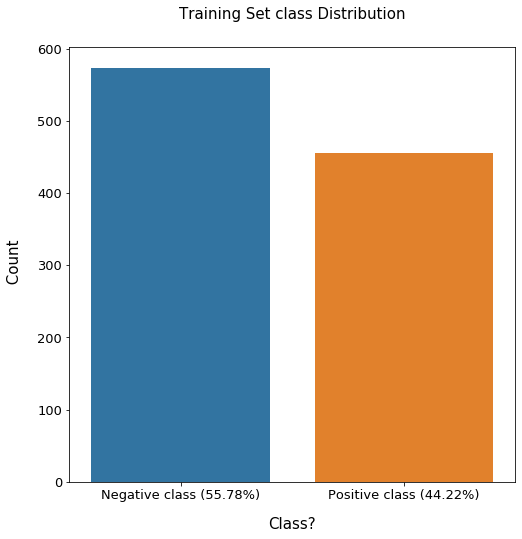

In [31]:
### Target variable exploration
target_variable_exploration(train_data, "classification", 'Class?', ' Count', 'Training Set class Distribution')

The classes are  balanced.

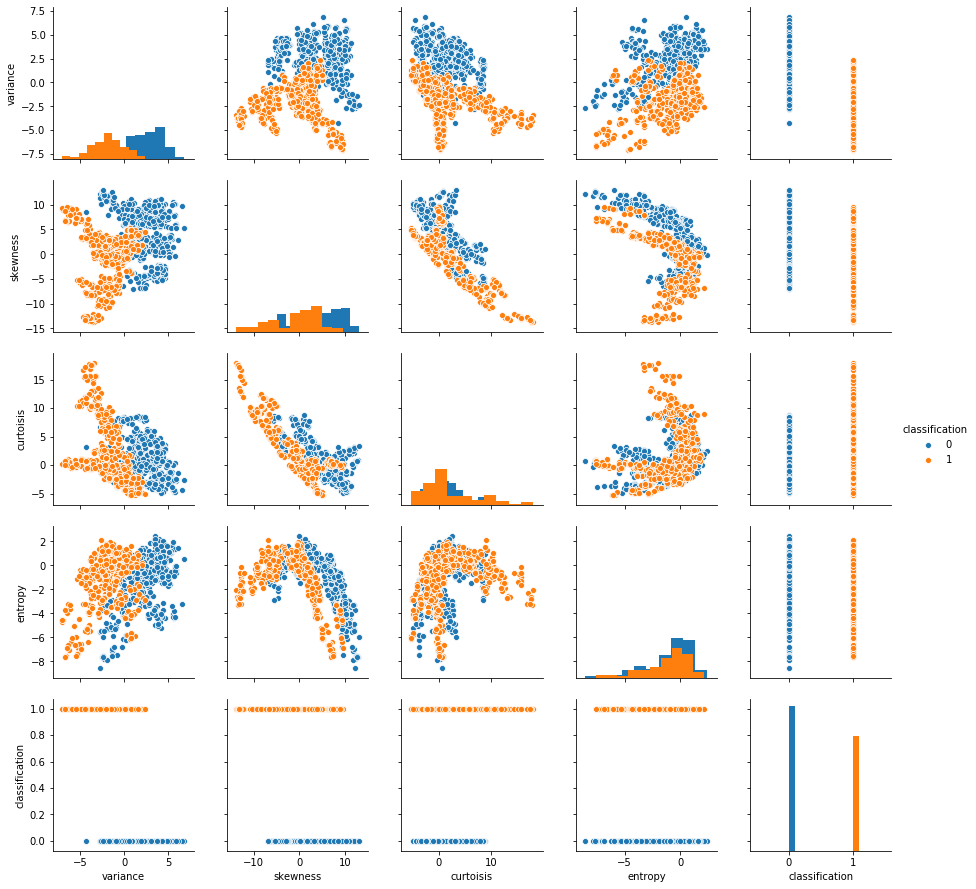

In [32]:
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

    - Curtoisis and skewness are negatively correlated ;
    - From Variance distribution plot, we can see that it is very discriminative. It might be might be the most influential variable.

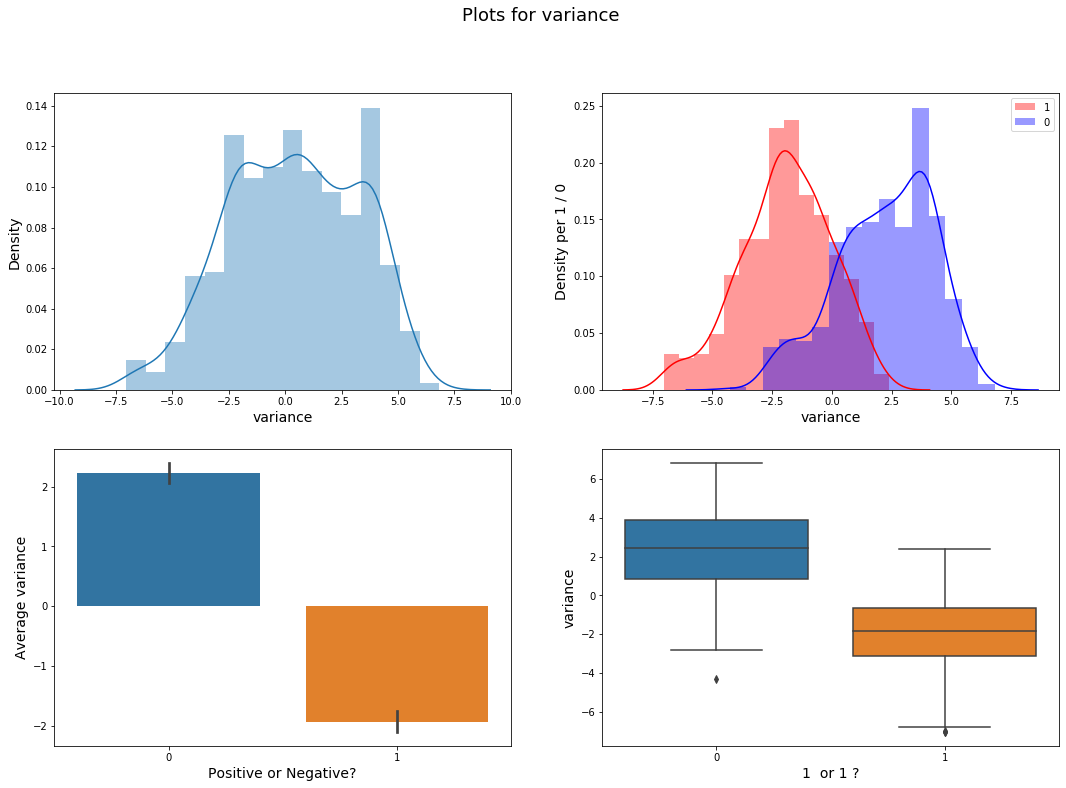

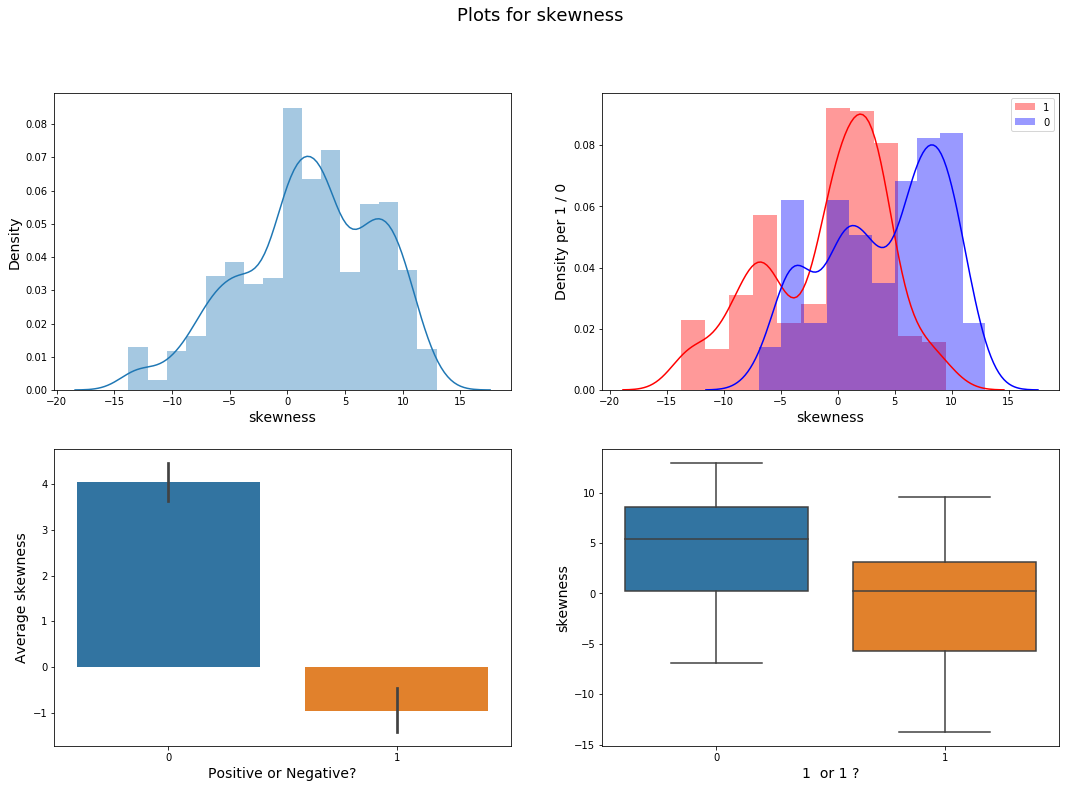

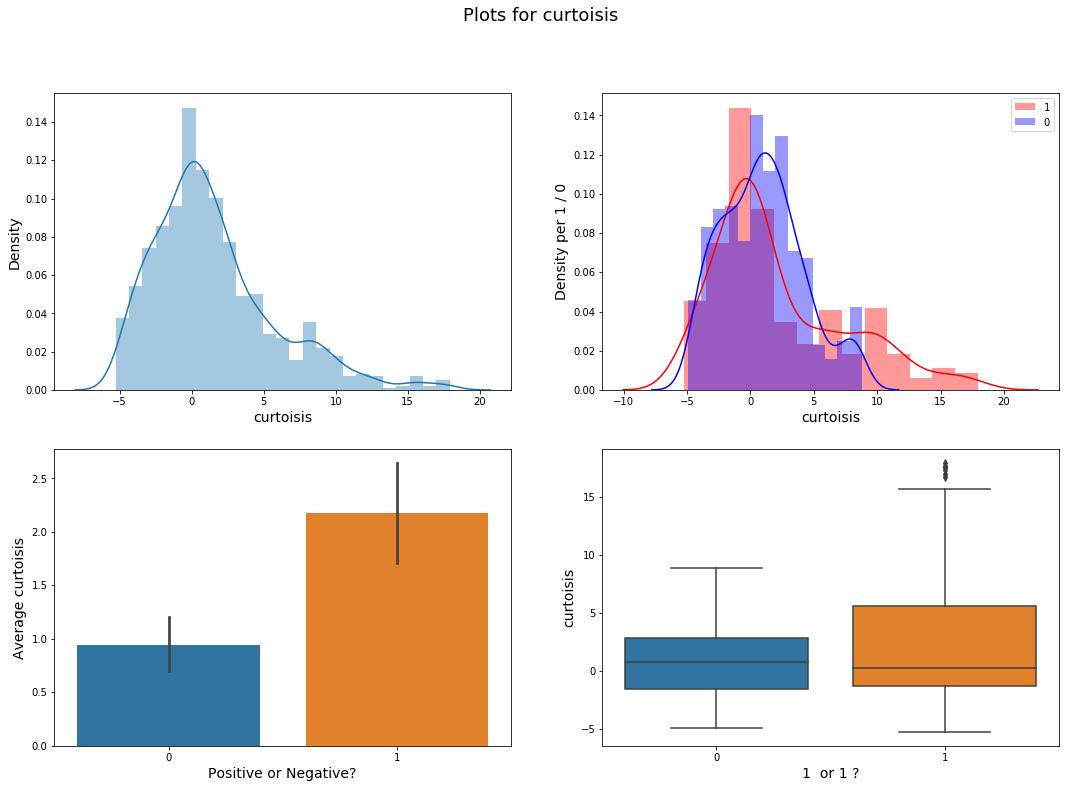

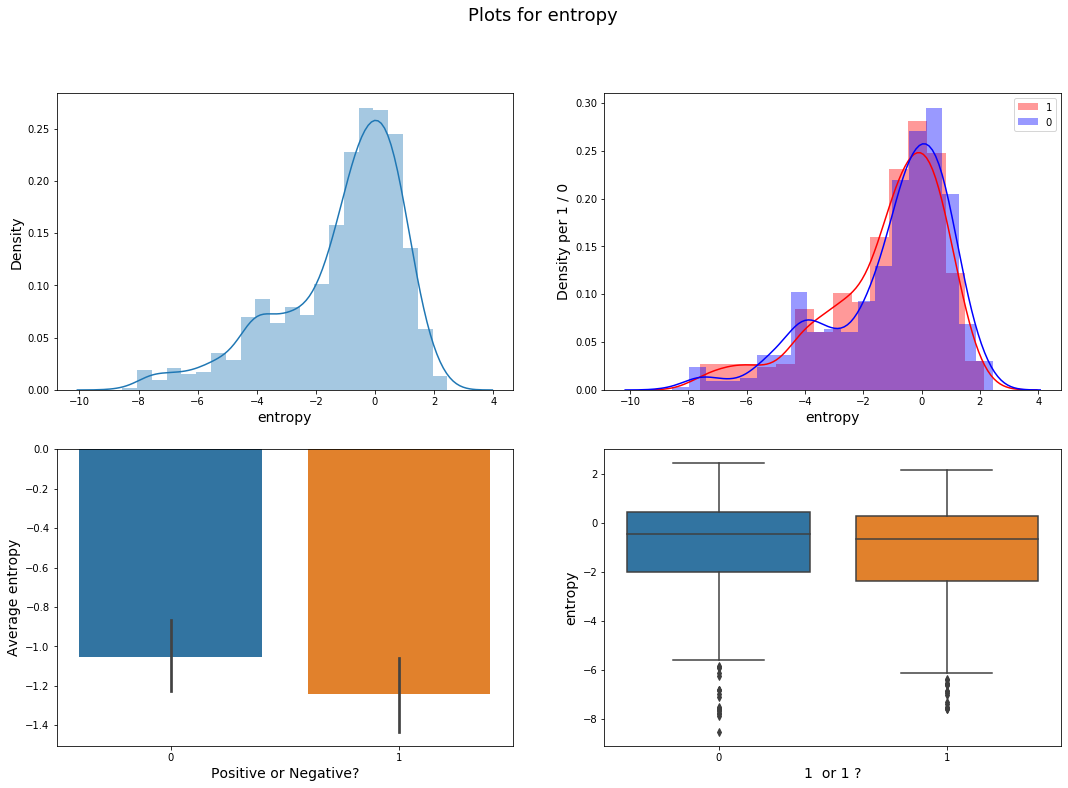

In [36]:
### Plotting Numeric Features
plot_numeric(train_data, numerical_features, 'classification')

- Entropy variable present some outliers.

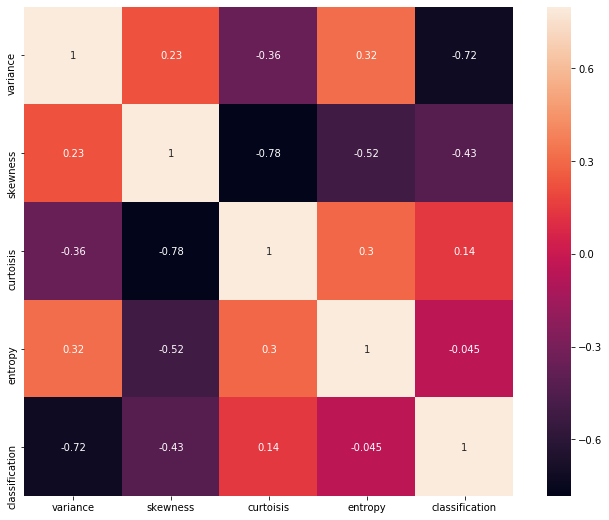

In [39]:
# Correlation
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot=True, square=True)

# fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # Gets the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


As mentionned before, variables "skewness" and "curtoisis" are negatively correlated.
Variance is stongly correlated with classification in comparison with other variables. This confirm our previous guess that it might be the most influential variable.

### Scaling

In [42]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

transf_train = featureEng(numerical_features, categorical_features=[]).fit(train_data)
X_train = transf_train.transform(train_data)
y_train = train_data['classification'].values

In [44]:
#  get columns names after transformations
X_train.shape

(1029, 4)

### PCA

In [45]:
# PCA on numerical features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[:,:len(numerical_features)])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

In [46]:
pca.explained_variance_ratio_

array([0.53465306, 0.33264572])

In [ ]:
Variance ratio As we performed a scaled 

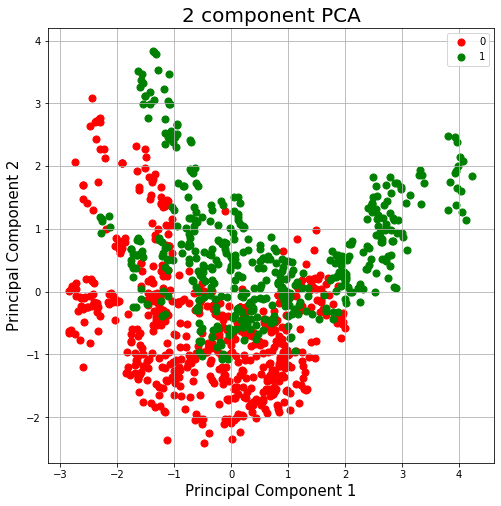

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

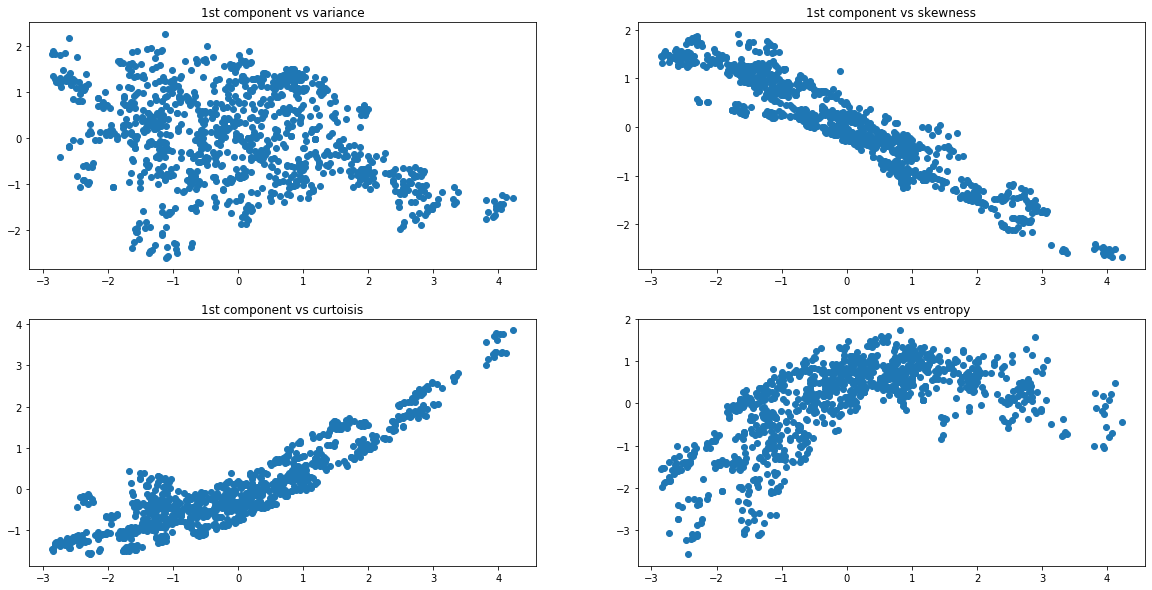

In [50]:
# First Component
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,10))
col_id = 0

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,0], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

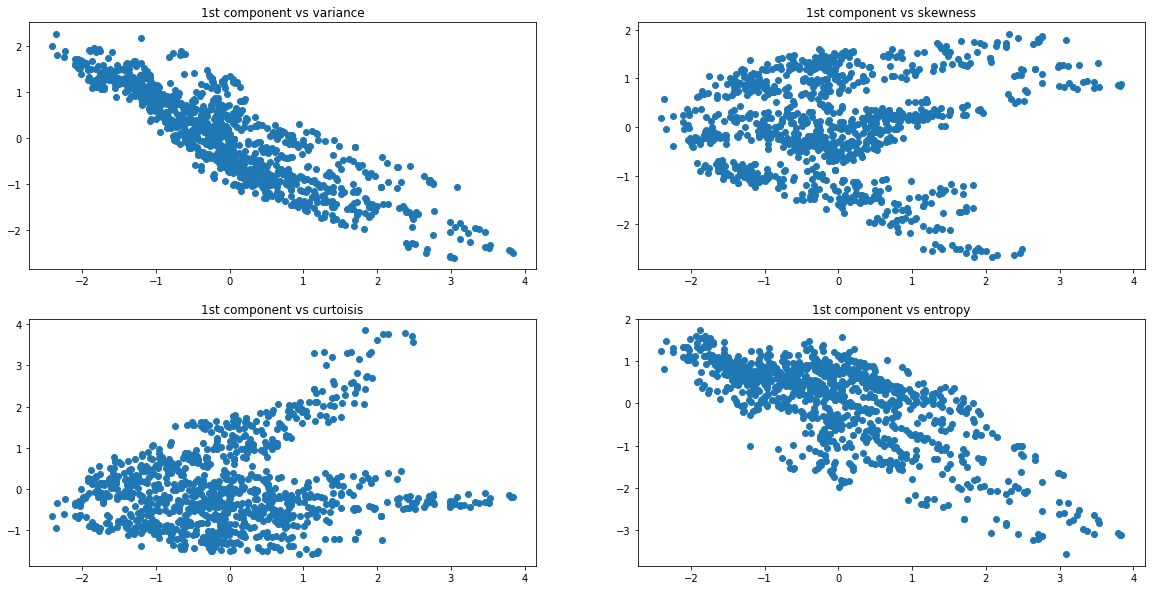

In [51]:
# Second component
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,10))
col_id = 0

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,1], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

Skewness and Curtoisis are correlated with PC1 while variance and entropy are correlated with the second.

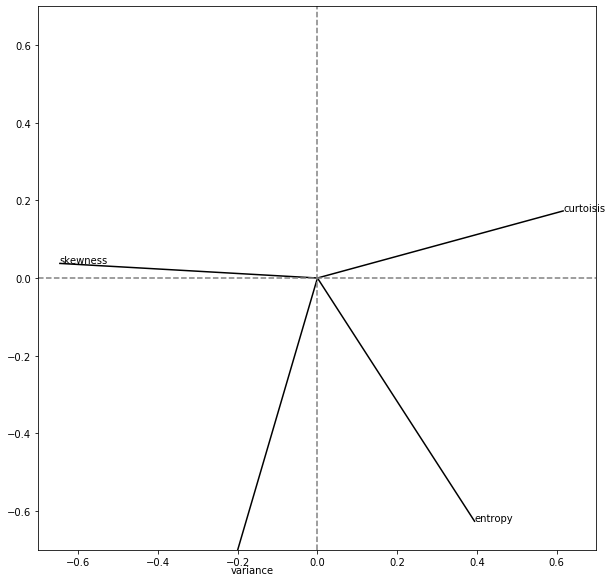

In [52]:
components = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, numerical_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

In [59]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

discreteCol = []

FSelector_mi = selectFeaturesTransformer(k=4,method="Mutual Information", discreteCol=False)
FSelector_rf = selectFeaturesTransformer(k=4,method="Random Forest")
FSelector_mi.fit(X_train,y_train)
FSelector_rf.fit(X_train,y_train)

selectFeaturesTransformer(discreteCol=[], k=4, method='Random Forest')

In [61]:
print("Features ordered by importance selected by Mutual information")
print([numerical_features[i]  for i in FSelector_mi.order[:10]])
print("Features ordered by importance selected by Random Forest")
print([numerical_features[i]  for i in FSelector_rf.order[:10]])

Features ordered by importance selected by Mutual information
['variance', 'skewness', 'curtoisis', 'entropy']
Features ordered by importance selected by Random Forest
['variance', 'skewness', 'curtoisis', 'entropy']


Both method find the same order, with variance at the top. This confirms our previous remarks.

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.linear_model import SGDClassifier
classifiers = [
    SGDClassifier(loss='log'), # for logistic regression
   KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB()]

ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)

#ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq]

names = ["Logistic Regression with SGD", "Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest","Gradient Boosting", "Neural Net",
         "Naive Bayes"]

parameters = {"Logistic Regression with SGD" : {'Classifier__penalty':['l1','l2',None],
                                               'Classifier__learning_rate' : ['constant','optimal','adaptive'],
                                               'Classifier__eta0' : [0.1]},
    "Nearest Neighbors" : {'Classifier__n_neighbors':[5,8,10]},
        'SVM':{'Classifier__kernel':['linear','rbf'],'Classifier__C':[0.1,0.5,1.,1.5]},
        "Gaussian Process":{"Classifier__kernel": kernel_list,
                            "Classifier__n_restarts_optimizer": [1, 2, 3]},
        "Decision Tree" : {"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]}
        ,"Random Forest":{"Classifier__n_estimators":[8,10,20,50],"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]},
       'Gradient Boosting':{"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[2,3,10],
                        "Classifier__learning_rate":[1e-1,1e-2,1e-3]},
         "Neural Net" : {'Classifier__hidden_layer_sizes': [(20,20,20), (25,50,25), (50,50)],
                      'Classifier__activation': ['tanh', 'relu'],"Classifier__learning_rate_init":[1e-1,1e-2,1e-3]},
        "Naive Bayes" : {"Classifier__var_smoothing" : [1e-8, 1e-9]}
         }

In [63]:
from sklearn.pipeline import Pipeline
# iterate over classifiers
from sklearn.model_selection import GridSearchCV
from IPython.display import display

results = pd.DataFrame()
for name, clf in zip(names, classifiers):
    print('############# ', name, ' #############')
    #print(params[name])
    FSelector = selectFeaturesTransformer()
    pipeline = Pipeline([('FeatureSelection',FSelector),('Classifier',clf)])
    parameters[name]['FeatureSelection__method'] = ['RF']
    parameters[name]['FeatureSelection__k']=[2,3,4]
   # print(parameters[name])
    classifier = GridSearchCV(pipeline, parameters[name], cv=3)
    #print(classifier)
    classifier.fit(X_train, y_train)
    # All results
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    r = pd.DataFrame(means,columns = ['mean_test_score'])
    r['std_test_score'] = stds
    r['params'] = classifier.cv_results_['params']
    r['classifier'] = name
    display(r.sort_values(by=['mean_test_score','std_test_score'],ascending =False))
    results = pd.concat([results, r], ignore_index=True)
    #for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        

# To do : Store overall 3 best performances 
    

#############  Logistic Regression with SGD  #############


,mean_test_score,std_test_score,params,classifier
10,0.990282,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
14,0.987366,0.004982,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
7,0.987366,0.002773,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
4,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
11,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
25,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
13,0.986395,0.009015,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
8,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
19,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
20,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD


#############  Nearest Neighbors  #############


,mean_test_score,std_test_score,params,classifier
2,0.999028,0.001377,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
8,0.999028,0.001377,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
5,0.998056,0.001377,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
1,0.995141,0.001383,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
4,0.995141,0.001374,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
7,0.993197,0.001359,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
0,0.929057,0.003525,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
3,0.929057,0.002754,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
6,0.924198,0.002297,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors


#############  SVM  #############


,mean_test_score,std_test_score,params,classifier
17,1.000000,0.000000,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
23,1.000000,0.000000,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
11,0.998056,0.001377,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
22,0.997085,0.002387,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
16,0.995141,0.001374,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
10,0.988338,0.002408,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
5,0.987366,0.001347,"{'Classifier__C': 0.1, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
19,0.985423,0.002396,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
20,0.984451,0.005497,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
13,0.984451,0.003647,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM


#############  Gaussian Process  #############


,mean_test_score,std_test_score,params,classifier
2,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
5,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
8,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
1,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
4,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
7,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
10,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
11,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
13,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
14,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process


#############  Decision Tree  #############


,mean_test_score,std_test_score,params,classifier
23,0.978620,0.004909,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
5,0.977648,0.008332,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
11,0.977648,0.005455,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
29,0.977648,0.005009,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
19,0.973761,0.007105,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
32,0.971817,0.007323,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
4,0.971817,0.001318,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
22,0.969874,0.020041,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
2,0.969874,0.014310,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
17,0.969874,0.003708,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree


#############  Random Forest  #############


,mean_test_score,std_test_score,params,classifier
47,0.991254,0.006292,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
59,0.991254,0.006292,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
95,0.991254,0.006292,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
119,0.991254,0.006292,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
125,0.991254,0.006292,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
...,...,...,...,...
99,0.923226,0.005808,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
72,0.922255,0.014436,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
111,0.922255,0.012927,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
87,0.922255,0.009737,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest


#############  Gradient Boosting  #############


,mean_test_score,std_test_score,params,classifier
20,0.992225,0.003628,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
23,0.992225,0.003628,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
50,0.992225,0.003628,"{'Classifier__learning_rate': 0.01, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
17,0.991254,0.007126,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
11,0.991254,0.004747,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
...,...,...,...,...
76,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
77,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
78,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Gradient Boosting
79,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting


#############  Neural Net  #############


,mean_test_score,std_test_score,params,classifier
1,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
2,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
4,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
5,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
7,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
8,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
11,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
13,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
14,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
16,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net


#############  Naive Bayes  #############


,mean_test_score,std_test_score,params,classifier
0,0.868805,0.014938,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
3,0.868805,0.014938,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
1,0.834791,0.025726,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
4,0.834791,0.025726,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
2,0.834791,0.025439,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes
5,0.834791,0.025439,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes


In [64]:
results_sorted = results.sort_values(by=['mean_test_score','std_test_score'],ascending =False)
results_sorted.iloc[:10]

,mean_test_score,std_test_score,params,classifier
53,1.0,0.0,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
59,1.0,0.0,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
340,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
341,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
343,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
344,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
346,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
347,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
350,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
352,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net


In [65]:
# apply transformations on test data
test_data = transf_alphaN.transform(test_data)
test_data = transf_num.transform(test_data)
#test_data = transf_Missing.transform(test_data)

KeyError: 'classification'

In [66]:
#test_data = test_data.drop("pcv", axis=1)
y_test = test_data['classification'].values
X_test = transf_train.transform(test_data)

In [67]:
X_test

array([[ 1.55350266, -0.17580658,  0.03555692,  1.11659275],
       [ 1.56002083,  1.07819382, -1.03907111, -0.16079059],
       [ 1.27423765,  0.14550836, -0.15889635,  0.89054022],
       ...,
       [-0.7371783 , -1.82176136,  1.51960831,  0.32792295],
       [ 1.49038856,  1.49357857, -1.42177106, -1.47356742],
       [ 1.28769451, -0.81735726,  0.16720664,  0.78683297]])

In [68]:
model_selected = results_sorted.iloc[0]
model = classifiers[names.index(model_selected['classifier'])]
param = {key.split('__')[1]:val for key,val in model_selected['params'].items() if 'FeatureSelection' not in key } 
model.set_params(**param)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       155

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

